## Imports

In [1]:
from trading_environment import TradingEnvironment

In [2]:
from trading_agent import TradingAgent

2025-06-15 01:31:29.194006: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-15 01:31:29.204041: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749931289.215750 2609275 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749931289.219613 2609275 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749931289.228982 2609275 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Creating Environment

In [3]:
env=TradingEnvironment(
    symbol="GOOGL",
    start_date="2015-01-01",
    end_date="2025-06-01",
    number_lags=5,
    sma_period=20,
    window=10,
    action_type="discrete",
    num_action=2,
    include_additional_features=True
)

/home/spiralmonster/Projects/ReinforcementLearningForFinance/AlogrithmicTrading/trading_environment.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['momentum']=data['returns'].rolling(self.window).mean().shift(1)
/home/spiralmonster/Projects/ReinforcementLearningForFinance/AlogrithmicTrading/trading_environment.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['volatilty']=data['returns'].rolling(self.window).std().shift(1)
/home/spiralmonster/Projects/ReinforcementLearningForFinance/Alogr

### Inspecting Data in Environment

#### Top 5 entries in Dataset

In [4]:
env.final_data.head()

GOOGL   returns  position  returns_lag1  returns_lag2  \
date                                                                 
2015-02-10  540.16  0.020348         1     -0.008644      0.007606   
2015-02-11  538.00 -0.004007         0      0.020348     -0.008644   
2015-02-12  546.01  0.014779         1     -0.004007      0.020348   
2015-02-13  551.16  0.009388         1      0.014779     -0.004007   
2015-02-17  545.01 -0.011221         0      0.009388      0.014779   

            returns_lag3  returns_lag4  returns_lag5  momentum  volatilty  \
date                                                                        
2015-02-10      0.007065     -0.013593      0.002065 -0.001396   0.020405   
2015-02-11      0.007606      0.007065     -0.013593  0.003575   0.018830   
2015-02-12     -0.008644      0.007606      0.007065  0.004869   0.017671   
2015-02-13      0.020348     -0.008644      0.007606  0.006191   0.017889   
2015-02-17     -0.004007      0.020348     -0.008644  0.002500   0.011283   

                 SMA     max     min  
date                                  
2015-02-10  521.7270  541.95  497.06  
2015-02-11  523.8820  541.95  501.80  
2015-02-12  525.6920  541.95  504.01  
2015-02-13  527.6960  546.01  504.01  
2015-02-17  530.0535  551.16  509.94

#### Last 5 entries in Dataset

In [5]:
env.final_data.tail()

GOOGL   returns  position  returns_lag1  returns_lag2  \
date                                                                 
2025-05-23  168.47 -0.014145         0      0.013611      0.027547   
2025-05-27  172.90  0.025956         1     -0.014145      0.013611   
2025-05-28  172.36 -0.003128         0      0.025956     -0.014145   
2025-05-29  171.86 -0.002905         0     -0.003128      0.025956   
2025-05-30  171.74 -0.000698         0     -0.002905     -0.003128   

            returns_lag3  returns_lag4  returns_lag5  momentum  volatilty  \
date                                                                        
2025-05-23     -0.015491      0.002104      0.013509  0.010213   0.018813   
2025-05-27      0.027547     -0.015491      0.002104  0.009796   0.019350   
2025-05-28      0.013611      0.027547     -0.015491  0.008721   0.017937   
2025-05-29     -0.014145      0.013611      0.027547  0.007735   0.018325   
2025-05-30      0.025956     -0.014145      0.013611  0.003849   0.015593   

                 SMA     max     min  
date                                  
2025-05-23  161.8085  170.87  151.38  
2025-05-27  162.1340  170.87  151.38  
2025-05-28  162.7485  172.90  151.38  
2025-05-29  163.3585  172.90  151.38  
2025-05-30  164.0115  172.90  151.38

#### Datset Info

In [6]:
env.final_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2592 entries, 2015-02-10 to 2025-05-30
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GOOGL         2592 non-null   float64
 1   returns       2592 non-null   float64
 2   position      2592 non-null   int64  
 3   returns_lag1  2592 non-null   float64
 4   returns_lag2  2592 non-null   float64
 5   returns_lag3  2592 non-null   float64
 6   returns_lag4  2592 non-null   float64
 7   returns_lag5  2592 non-null   float64
 8   momentum      2592 non-null   float64
 9   volatilty     2592 non-null   float64
 10  SMA           2592 non-null   float64
 11  max           2592 non-null   float64
 12  min           2592 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 283.5 KB


#### Data Statistics

In [7]:
env.final_data.describe()

GOOGL      returns     position  returns_lag1  returns_lag2  \
count  2592.000000  2592.000000  2592.000000   2592.000000   2592.000000   
mean    999.506906    -0.000434     0.535494     -0.000437     -0.000433   
std     778.396569     0.062063     0.498835      0.062063      0.062063   
min      83.430000    -3.020619     0.000000     -3.020619     -3.020619   
25%     179.135000    -0.007746     0.000000     -0.007772     -0.007772   
50%     936.305000     0.001201     1.000000      0.001201      0.001208   
75%    1276.805000     0.009815     1.000000      0.009815      0.009815   
max    2996.770000     0.150645     1.000000      0.150645      0.150645   

       returns_lag3  returns_lag4  returns_lag5     momentum    volatilty  \
count   2592.000000   2592.000000   2592.000000  2592.000000  2592.000000   
mean      -0.000429     -0.000445     -0.000438    -0.000440     0.019867   
std        0.062063      0.062061      0.062061     0.019434     0.058867   
min       -3.020619     -3.020619     -3.020619    -0.309662     0.002026   
25%       -0.007772     -0.007777     -0.007772    -0.002106     0.010267   
50%        0.001218      0.001208      0.001218     0.000867     0.014401   
75%        0.009815      0.009802      0.009802     0.003949     0.020004   
max        0.150645      0.150645      0.150645     0.024934     0.958127   

               SMA          max          min  
count  2592.000000  2592.000000  2592.000000  
mean   1000.963895  1053.564726   947.681698  
std     772.439739   813.447016   737.253740  
min      88.859500    92.120000    83.430000  
25%     183.092500   195.400000   168.950000  
50%     939.551000   959.560000   888.990000  
75%    1273.761750  1347.147500  1209.705000  
max    2946.271000  2996.770000  2869.940000

#### Correlation between features

In [8]:
env.final_data.corr()

GOOGL   returns  position  returns_lag1  returns_lag2  \
GOOGL         1.000000  0.023764  0.013699      0.022988      0.023211   
returns       0.023764  1.000000  0.223188     -0.021048      0.002745   
position      0.013699  0.223188  1.000000     -0.023337     -0.017691   
returns_lag1  0.022988 -0.021048 -0.023337      1.000000     -0.021054   
returns_lag2  0.023211  0.002745 -0.017691     -0.021054      1.000000   
returns_lag3  0.023405  0.003079 -0.035332      0.002739     -0.021049   
returns_lag4  0.023903  0.019141  0.010999      0.003090      0.002735   
returns_lag5  0.024114  0.009566  0.013631      0.019139      0.003089   
momentum      0.074306 -0.010985 -0.018471      0.307615      0.304766   
volatilty    -0.076417  0.002612  0.006696     -0.293678     -0.294488   
SMA           0.987009 -0.033189  0.000398     -0.030503     -0.027878   
max           0.967730 -0.032887 -0.000084     -0.032249     -0.031938   
min           0.996193 -0.033129 -0.000527      0.018974      0.019075   

              returns_lag3  returns_lag4  returns_lag5  momentum  volatilty  \
GOOGL             0.023405      0.023903      0.024114  0.074306  -0.076417   
returns           0.003079      0.019141      0.009566 -0.010985   0.002612   
position         -0.035332      0.010999      0.013631 -0.018471   0.006696   
returns_lag1      0.002739      0.003090      0.019139  0.307615  -0.293678   
returns_lag2     -0.021049      0.002735      0.003089  0.304766  -0.294488   
returns_lag3      1.000000     -0.021052      0.002733  0.309240  -0.296958   
returns_lag4     -0.021052      1.000000     -0.021020  0.319188  -0.306684   
returns_lag5      0.002733     -0.021020      1.000000  0.324929  -0.305215   
momentum          0.309240      0.319188      0.324929  1.000000  -0.960862   
volatilty        -0.296958     -0.306684     -0.305215 -0.960862   1.000000   
SMA              -0.025156     -0.022119     -0.019414 -0.056994   0.049881   
max              -0.032157     -0.031628     -0.031596 -0.100954   0.101300   
min               0.019446      0.020378      0.020702  0.065249  -0.077193   

                   SMA       max       min  
GOOGL         0.987009  0.967730  0.996193  
returns      -0.033189 -0.032887 -0.033129  
position      0.000398 -0.000084 -0.000527  
returns_lag1 -0.030503 -0.032249  0.018974  
returns_lag2 -0.027878 -0.031938  0.019075  
returns_lag3 -0.025156 -0.032157  0.019446  
returns_lag4 -0.022119 -0.031628  0.020378  
returns_lag5 -0.019414 -0.031596  0.020702  
momentum     -0.056994 -0.100954  0.065249  
volatilty     0.049881  0.101300 -0.077193  
SMA           1.000000  0.990683  0.990007  
max           0.990683  1.000000  0.969907  
min           0.990007  0.969907  1.000000

### Plots to understand the Data:

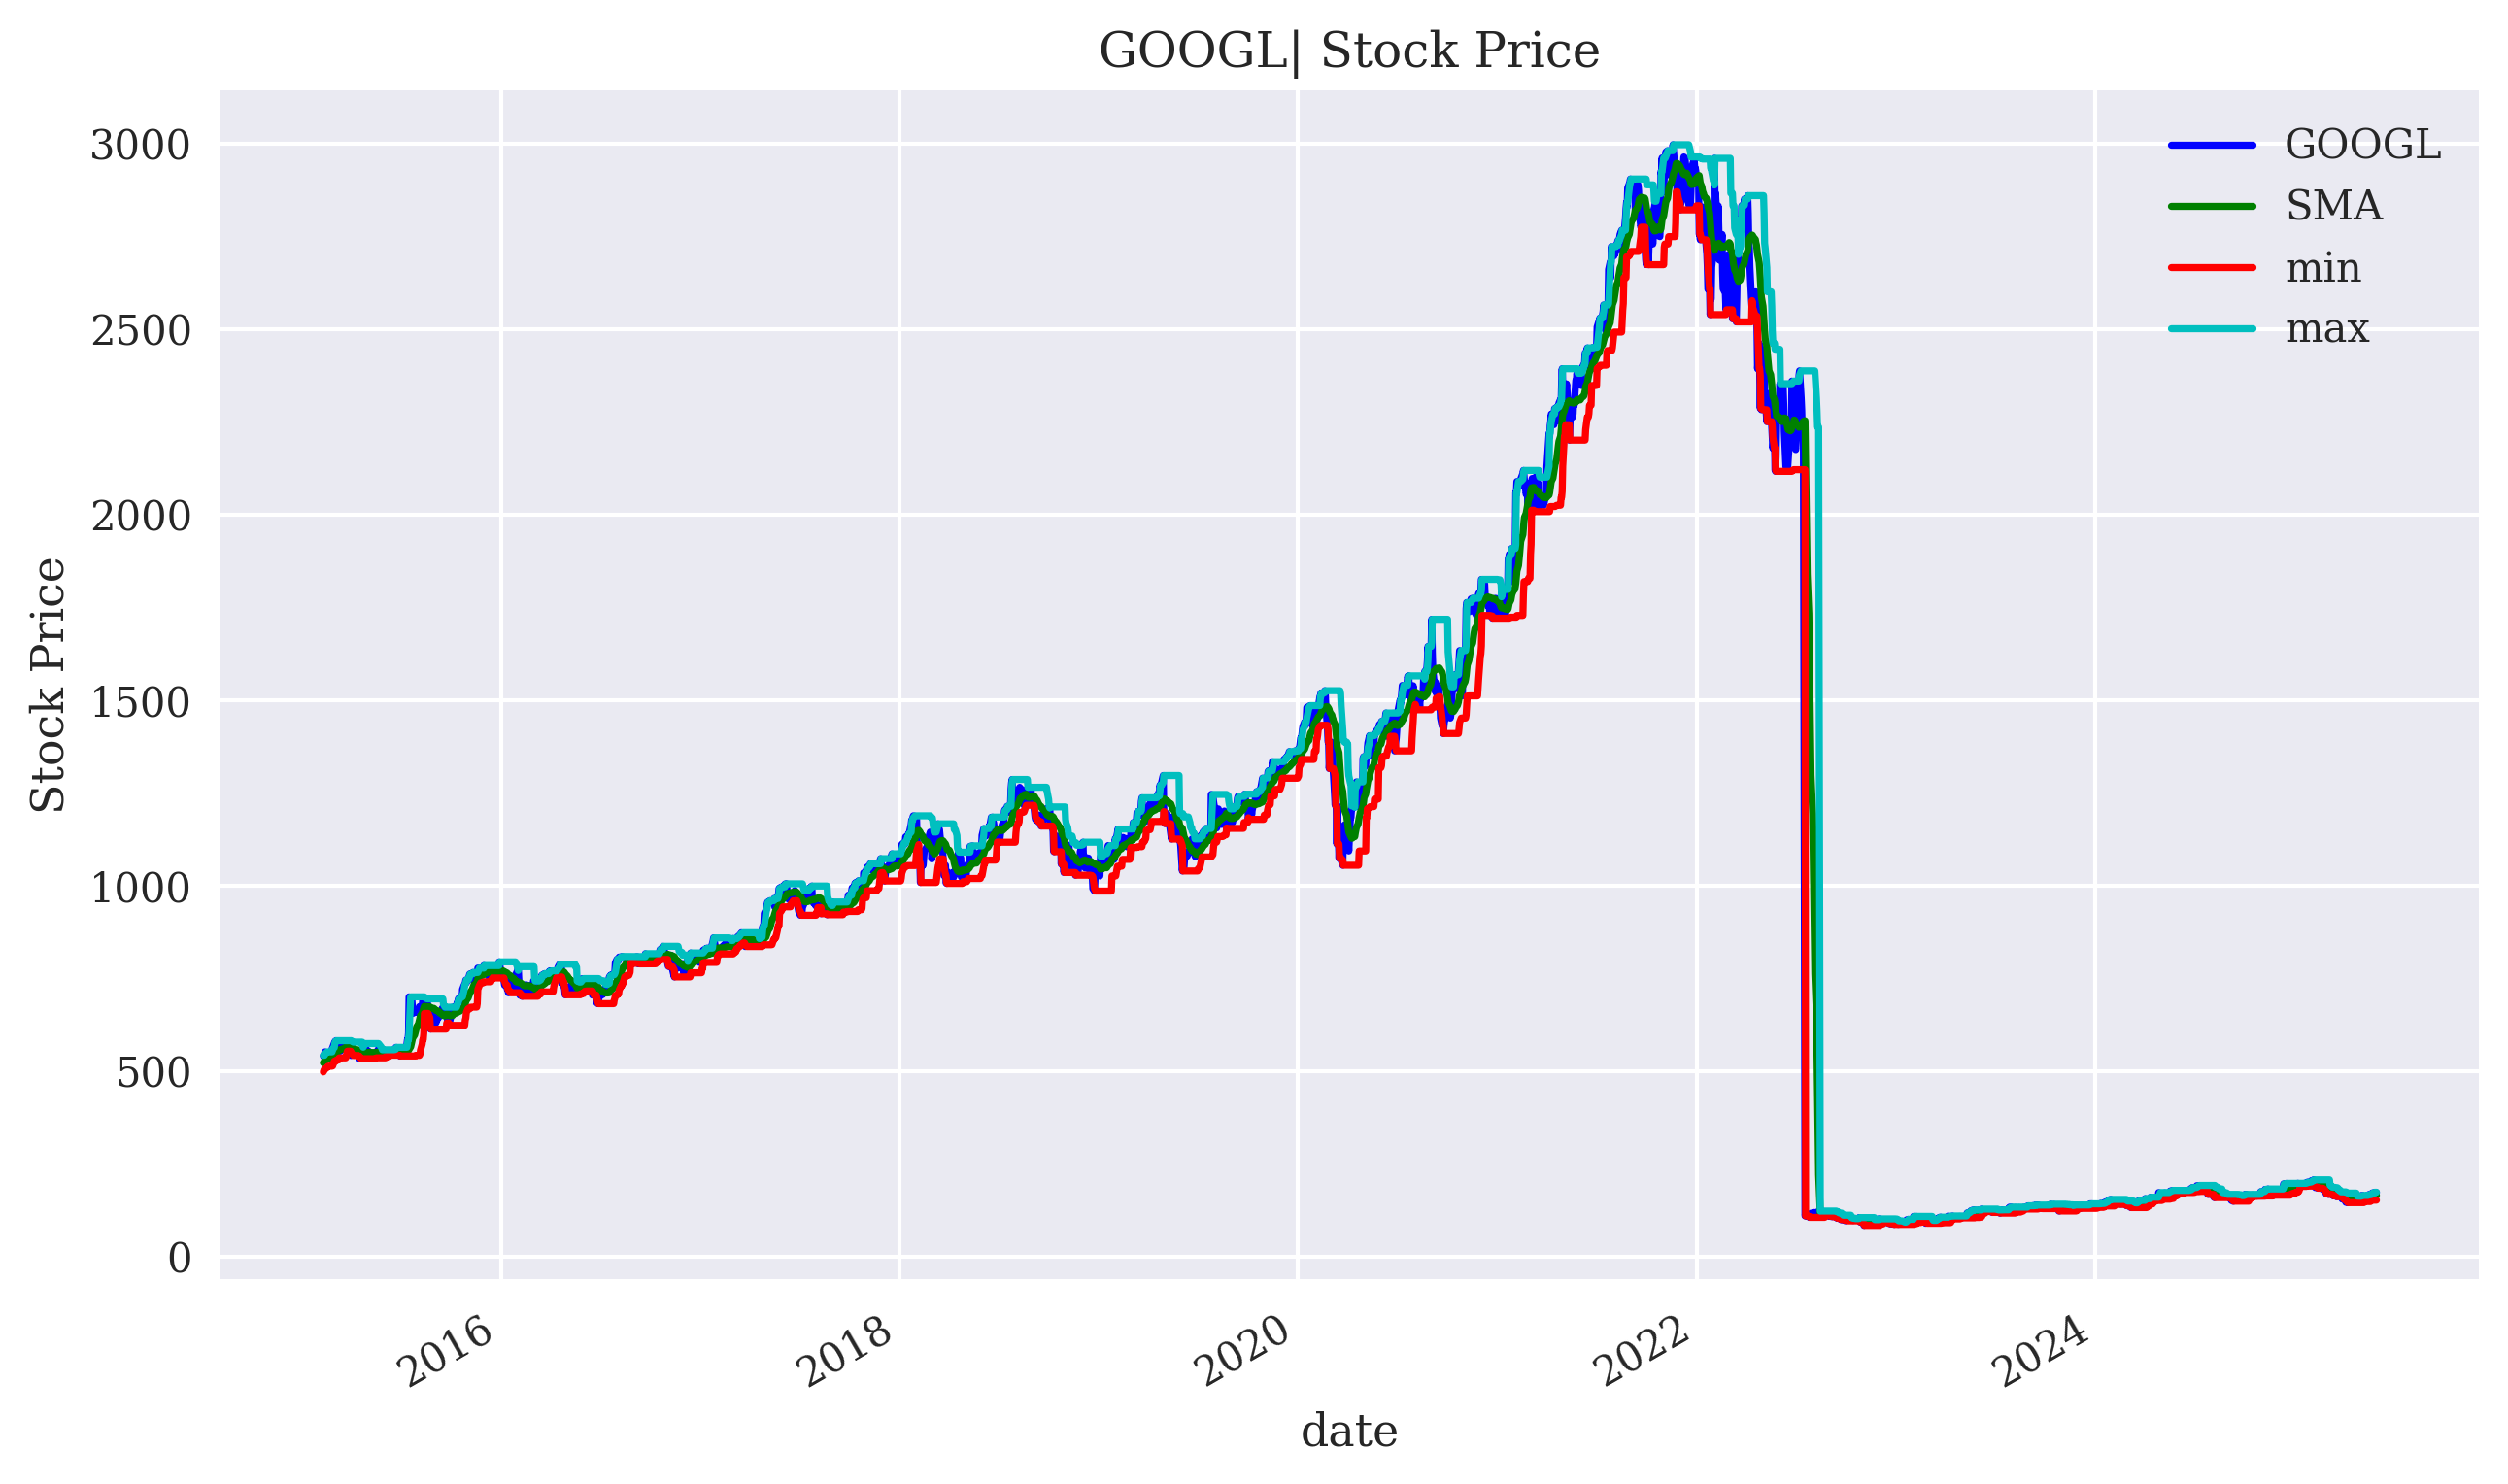

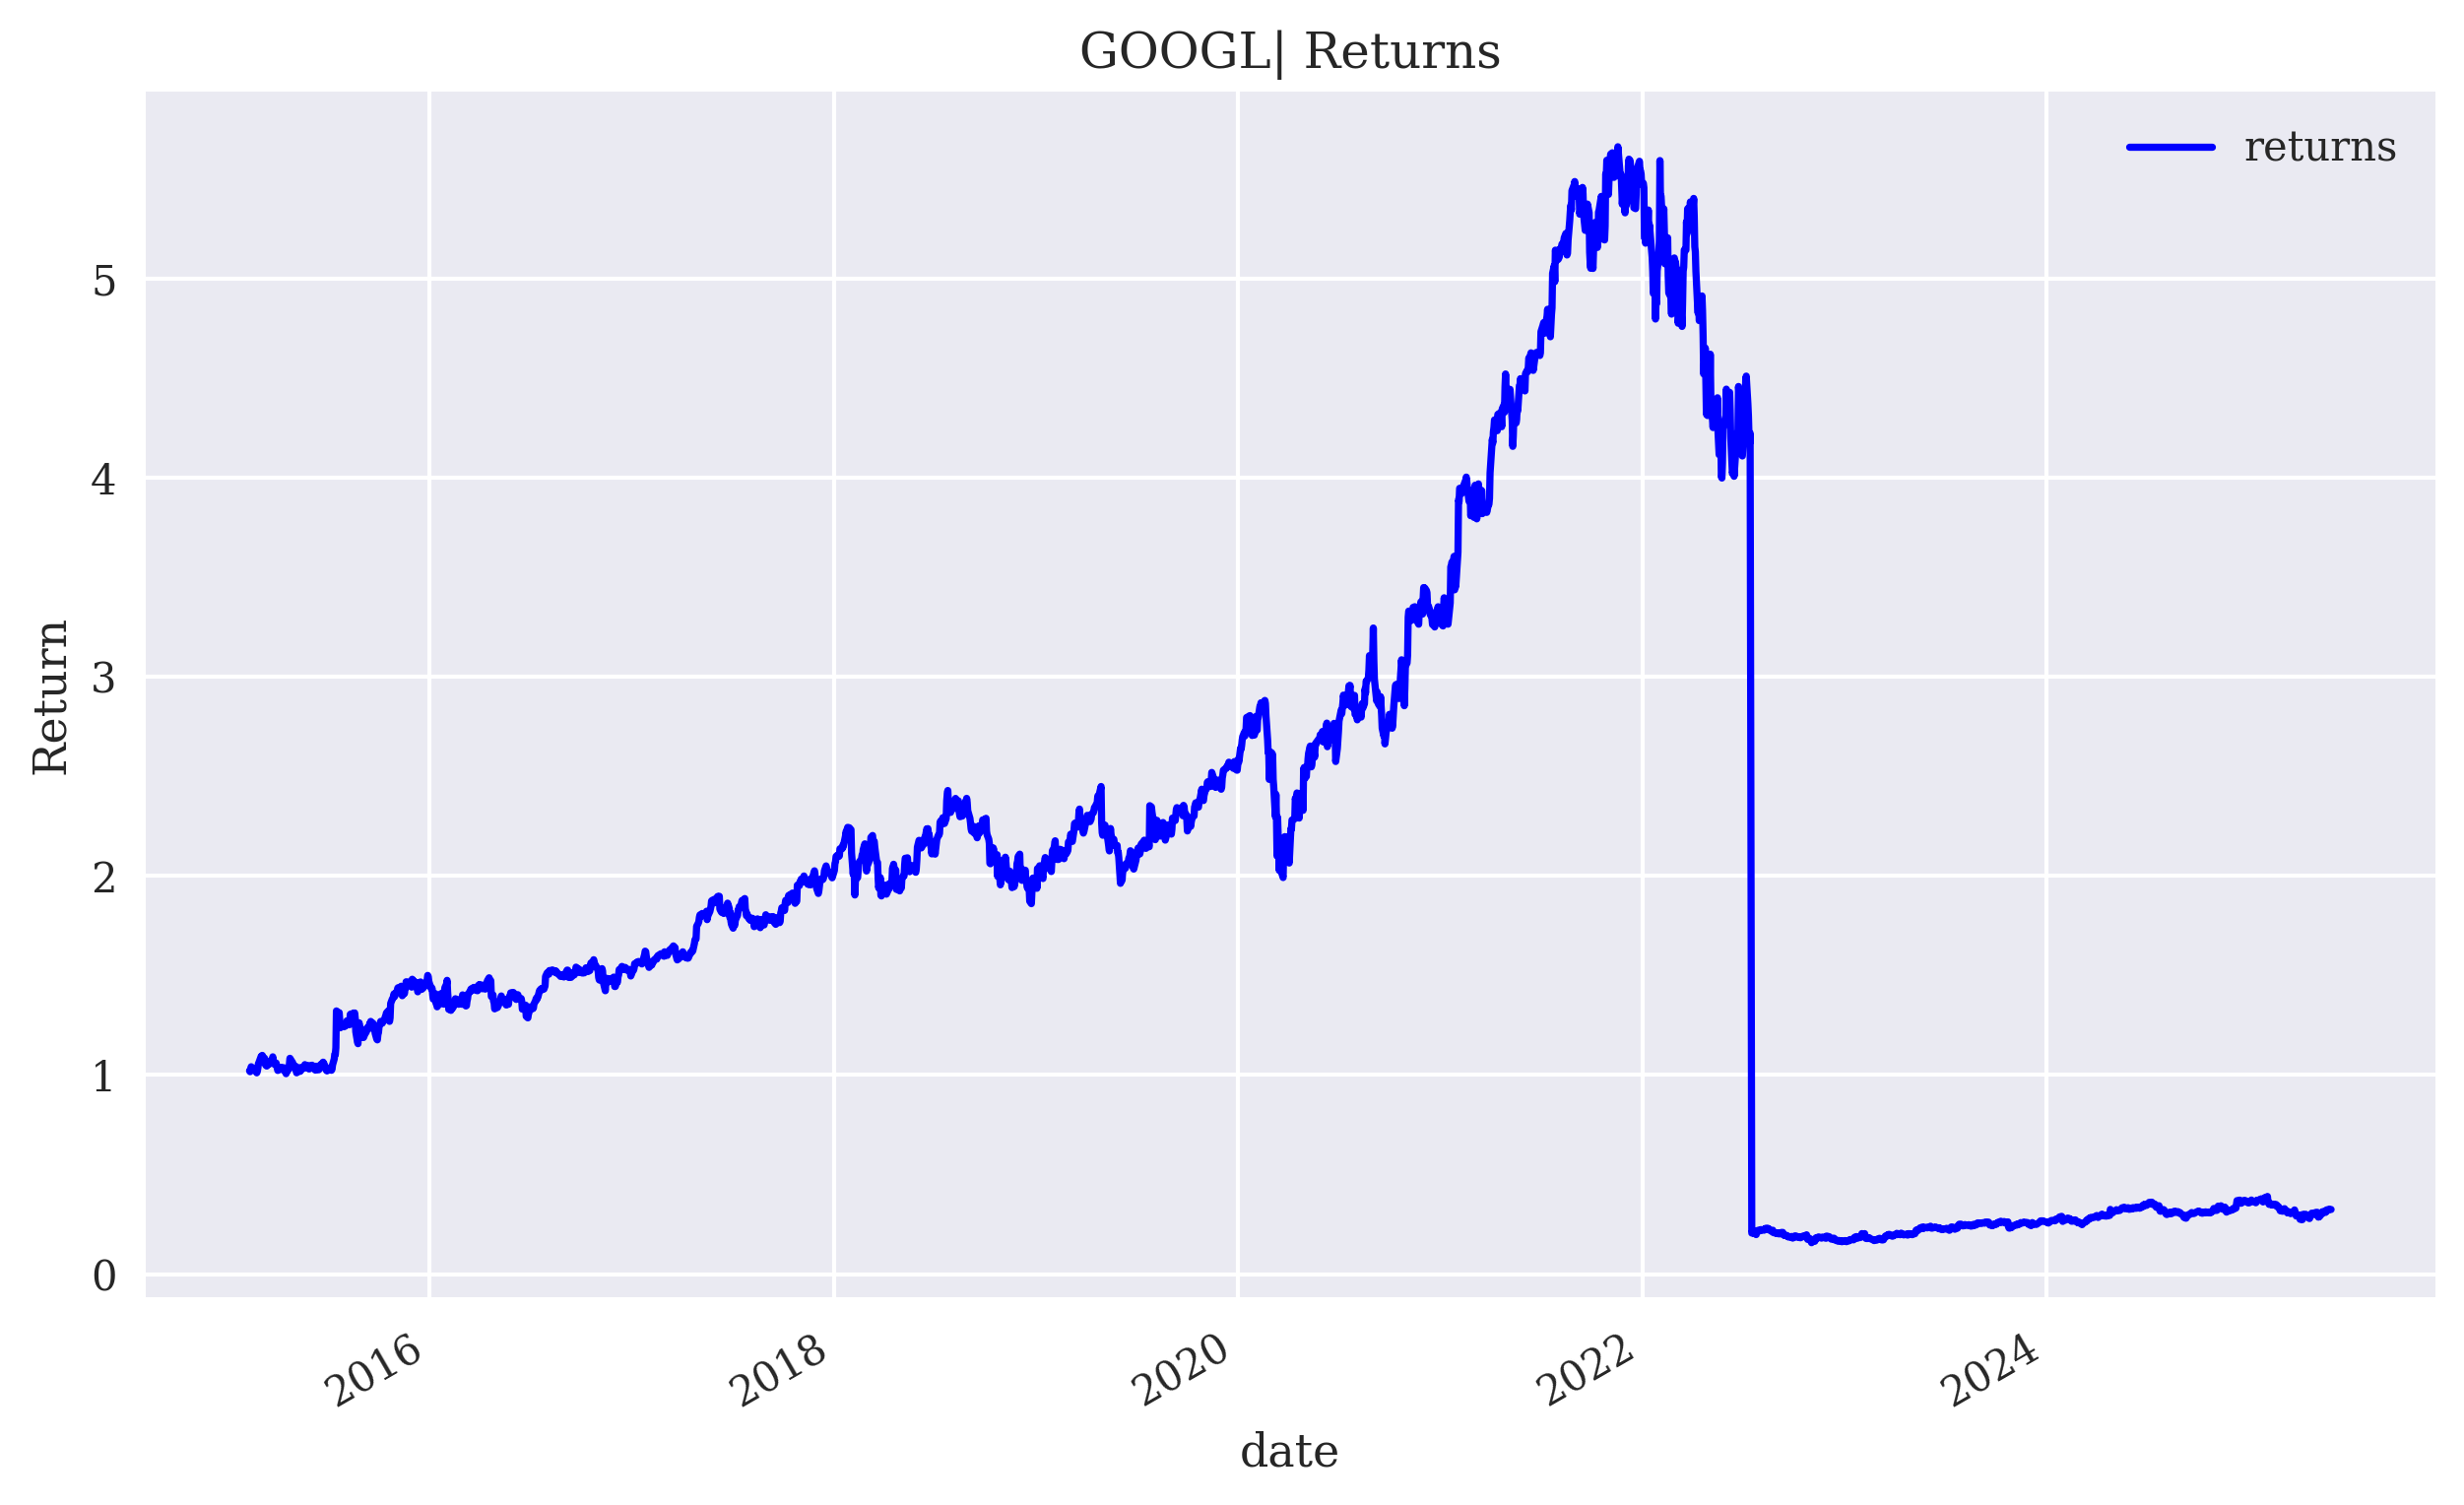

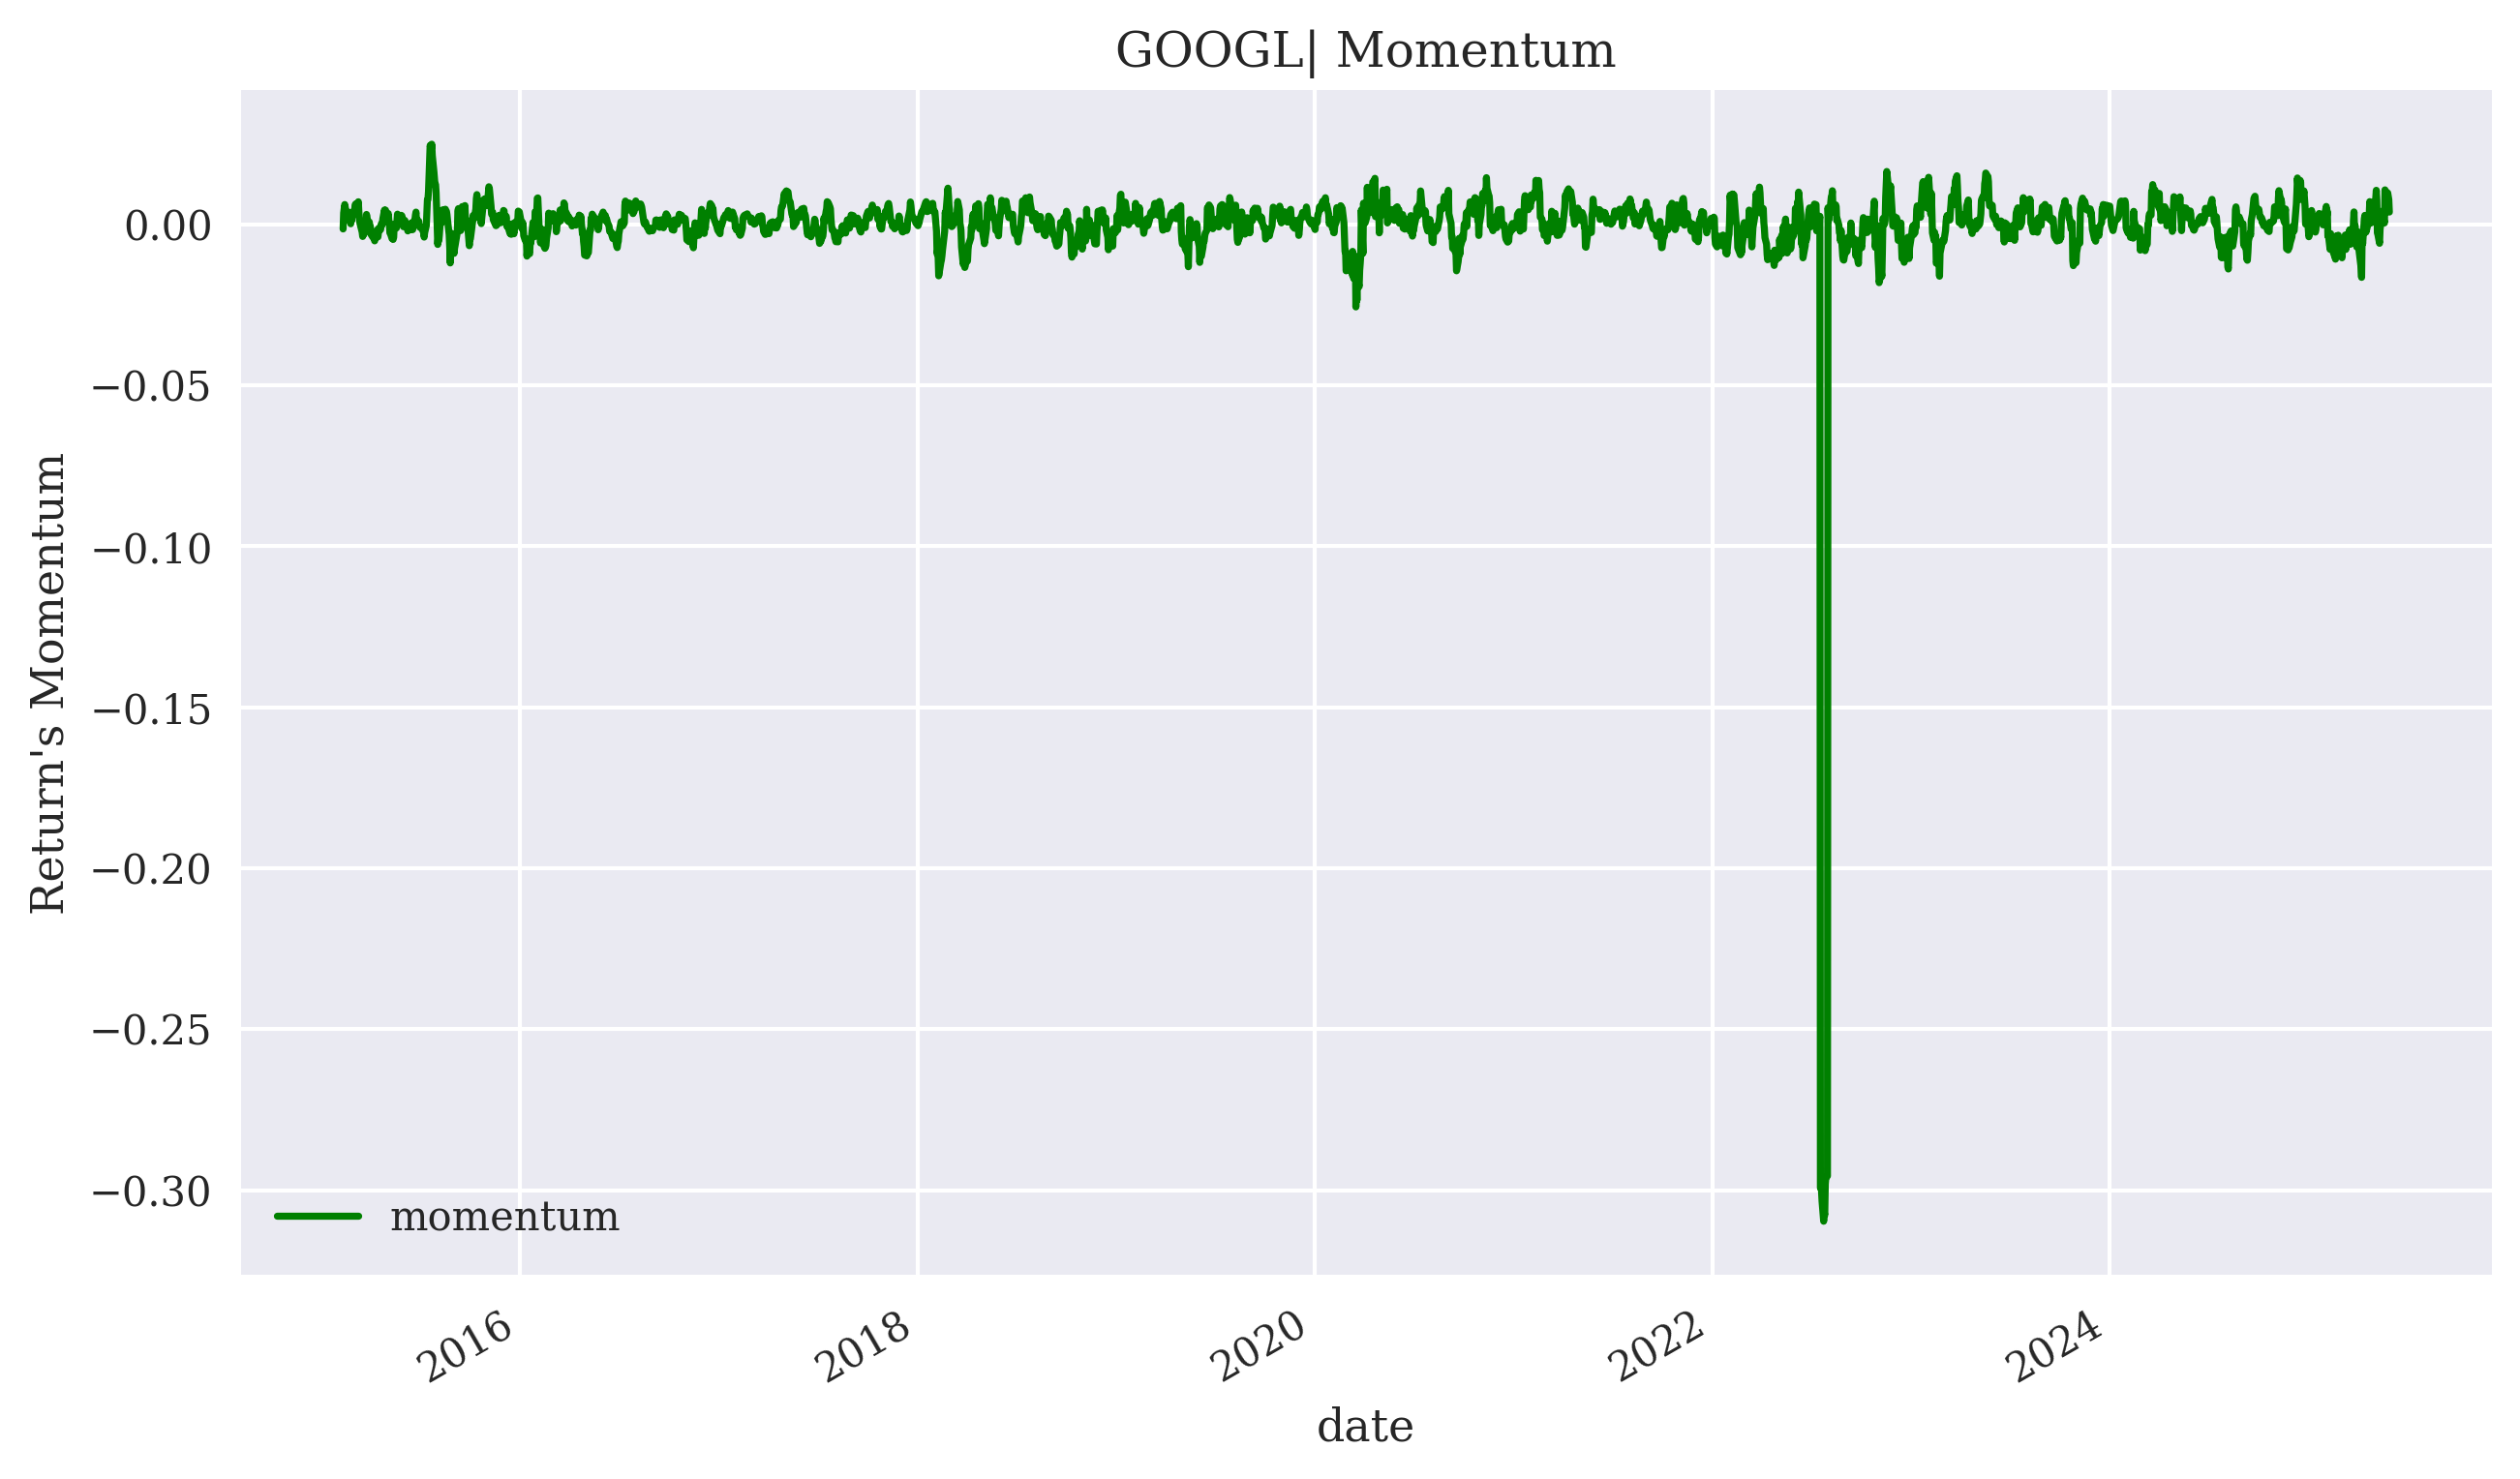

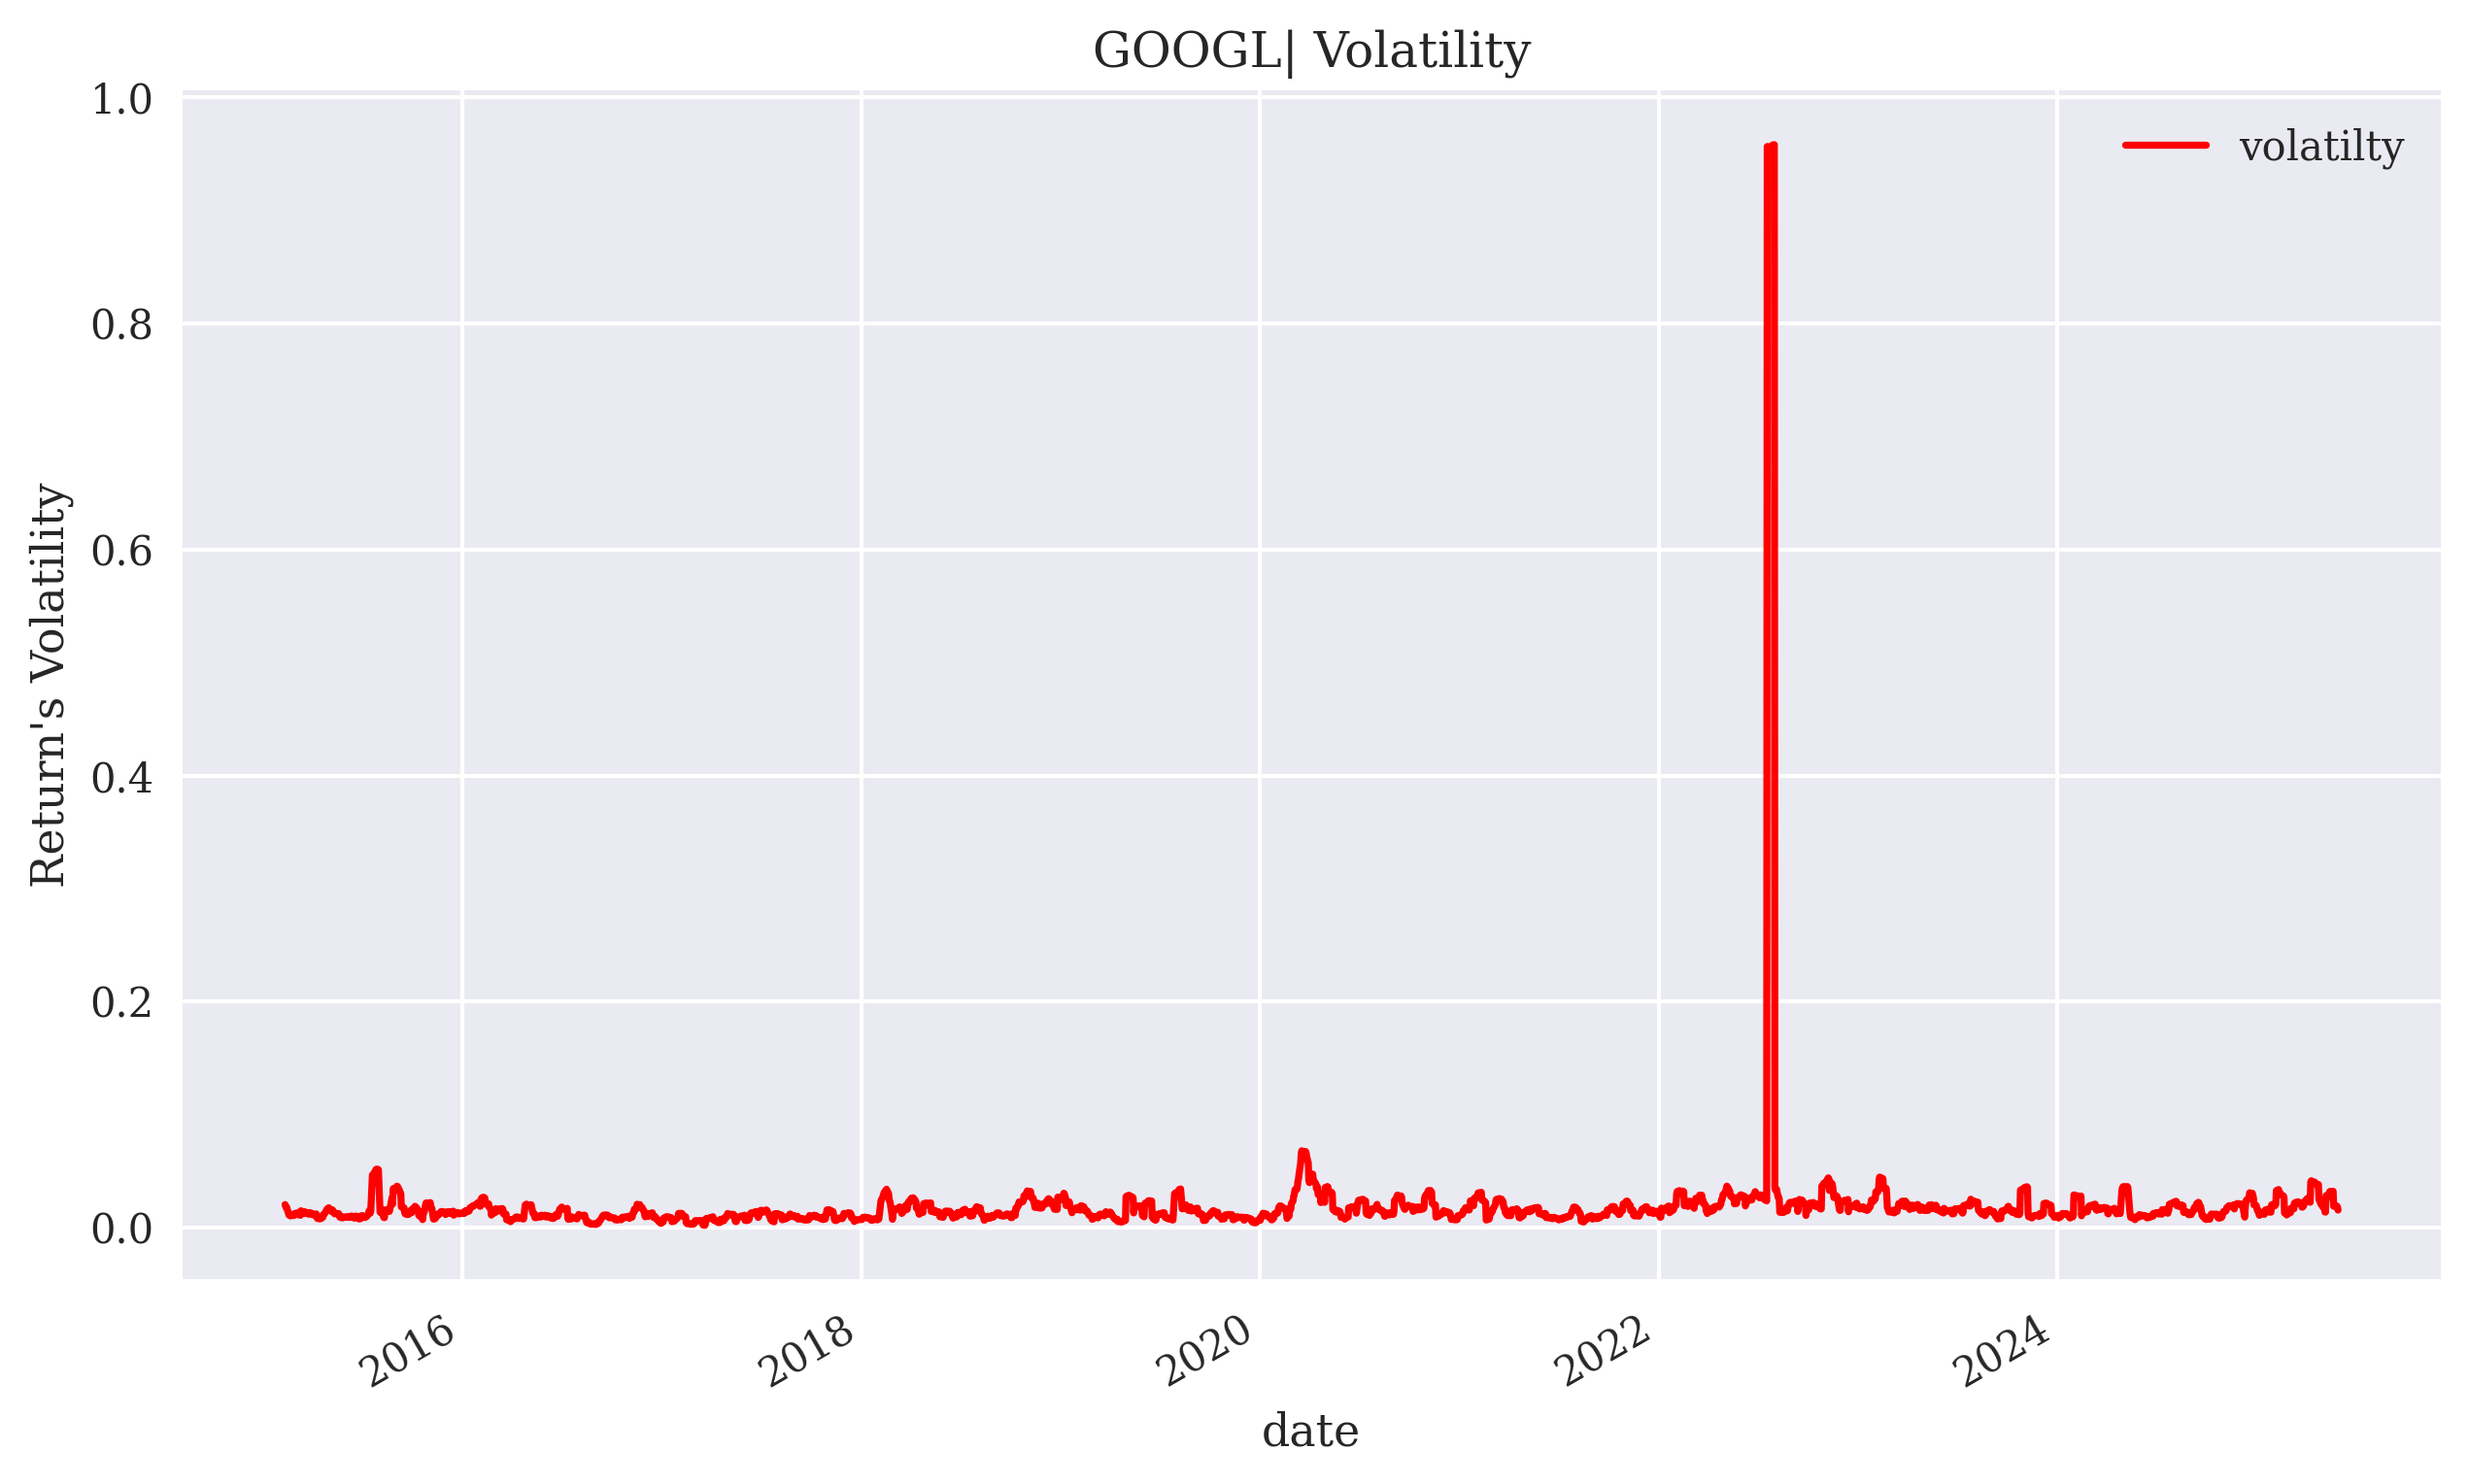

In [9]:
env.plots_from_dataset()

## Agent

#### Model Config For Neural Network

In [10]:
from tensorflow.keras.regularizers import l2

In [11]:
model_config={
    "hidden_layers":[
        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },
        {
            "units":32,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":l2(0.01)
        },
        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":l2(0.01)
        },
        {
            "units":8,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        }
    ],
    "final_layer":{
        "units":2,
        "activation":"linear",
        "kernel_initializer":"he_uniform",
        "kernel_regularizer":None
    }
    
}

#### Optimizer Config

In [12]:
optimizer_config={
    "learning_rate":0.001,
    "beta_1":0.96,
    "beta_2":0.98
}

#### Agent Initialization

In [13]:
agent=TradingAgent(
    env=env,
    model_config=model_config,
    optimizer_config=optimizer_config,
    batch_size=64,
    buffer_size=2000,
    gamma=0.7,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.9975,
    min_pred_accuracy=0.4,
    min_performance=0.8
    
)

2025-06-15 01:31:34.400479: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


#### Model Architecture

In [14]:
agent.get_model_architecture()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,402 (5.48 KB)

 Trainable params: 1,402 (5.48 KB)

 Non-trainable params: 0 (0.00 B)

## Training Agent

In [15]:
agent.train_agent(
    episodes=200,
    steps_per_episode=2,
    training_version="1_o",
    verbose=True
)

Training Episode 10/200| Reward: 3| Epsilon: 0.9777236924095912| Steps: 17| Prediction Accuracy: 0.35294117647058826| Performance: 1.005719988769174
Training Episode 20/200| Reward: -34| Epsilon: 0.9535537596522975| Steps: 976| Prediction Accuracy: 0.492827868852459| Performance: 0.7965635035899202
Training Episode 30/200| Reward: -5| Epsilon: 0.9299813225412964| Steps: 17| Prediction Accuracy: 0.35294117647058826| Performance: 0.9156542444295842
Training Episode 40/200| Reward: -1| Epsilon: 0.906991610615664| Steps: 33| Prediction Accuracy: 0.3939393939393939| Performance: 0.919995493039921
Training Episode 50/200| Reward: 1| Epsilon: 0.8845702185493802| Steps: 17| Prediction Accuracy: 0.35294117647058826| Performance: 0.9838754593255796
Training Episode 60/200| Reward: 1| Epsilon: 0.86270309712497| Steps: 17| Prediction Accuracy: 0.35294117647058826| Performance: 1.0159949155286523
Training Episode 70/200| Reward: -26| Epsilon: 0.8413765444302803| Steps: 852| Prediction Accuracy: 0.5

Model saved successfully at: /home/spiralmonster/Projects/ReinforcementLearningForFinance/AlogrithmicTrading/Models/Model_version_1_o.keras
Model saved successfully at: /home/spiralmonster/Projects/ReinforcementLearningForFinance/AlogrithmicTrading/Models/Model_version_1_o.h5


## Testing Agent

Reward: -185| Performance: 2.941182637417817|


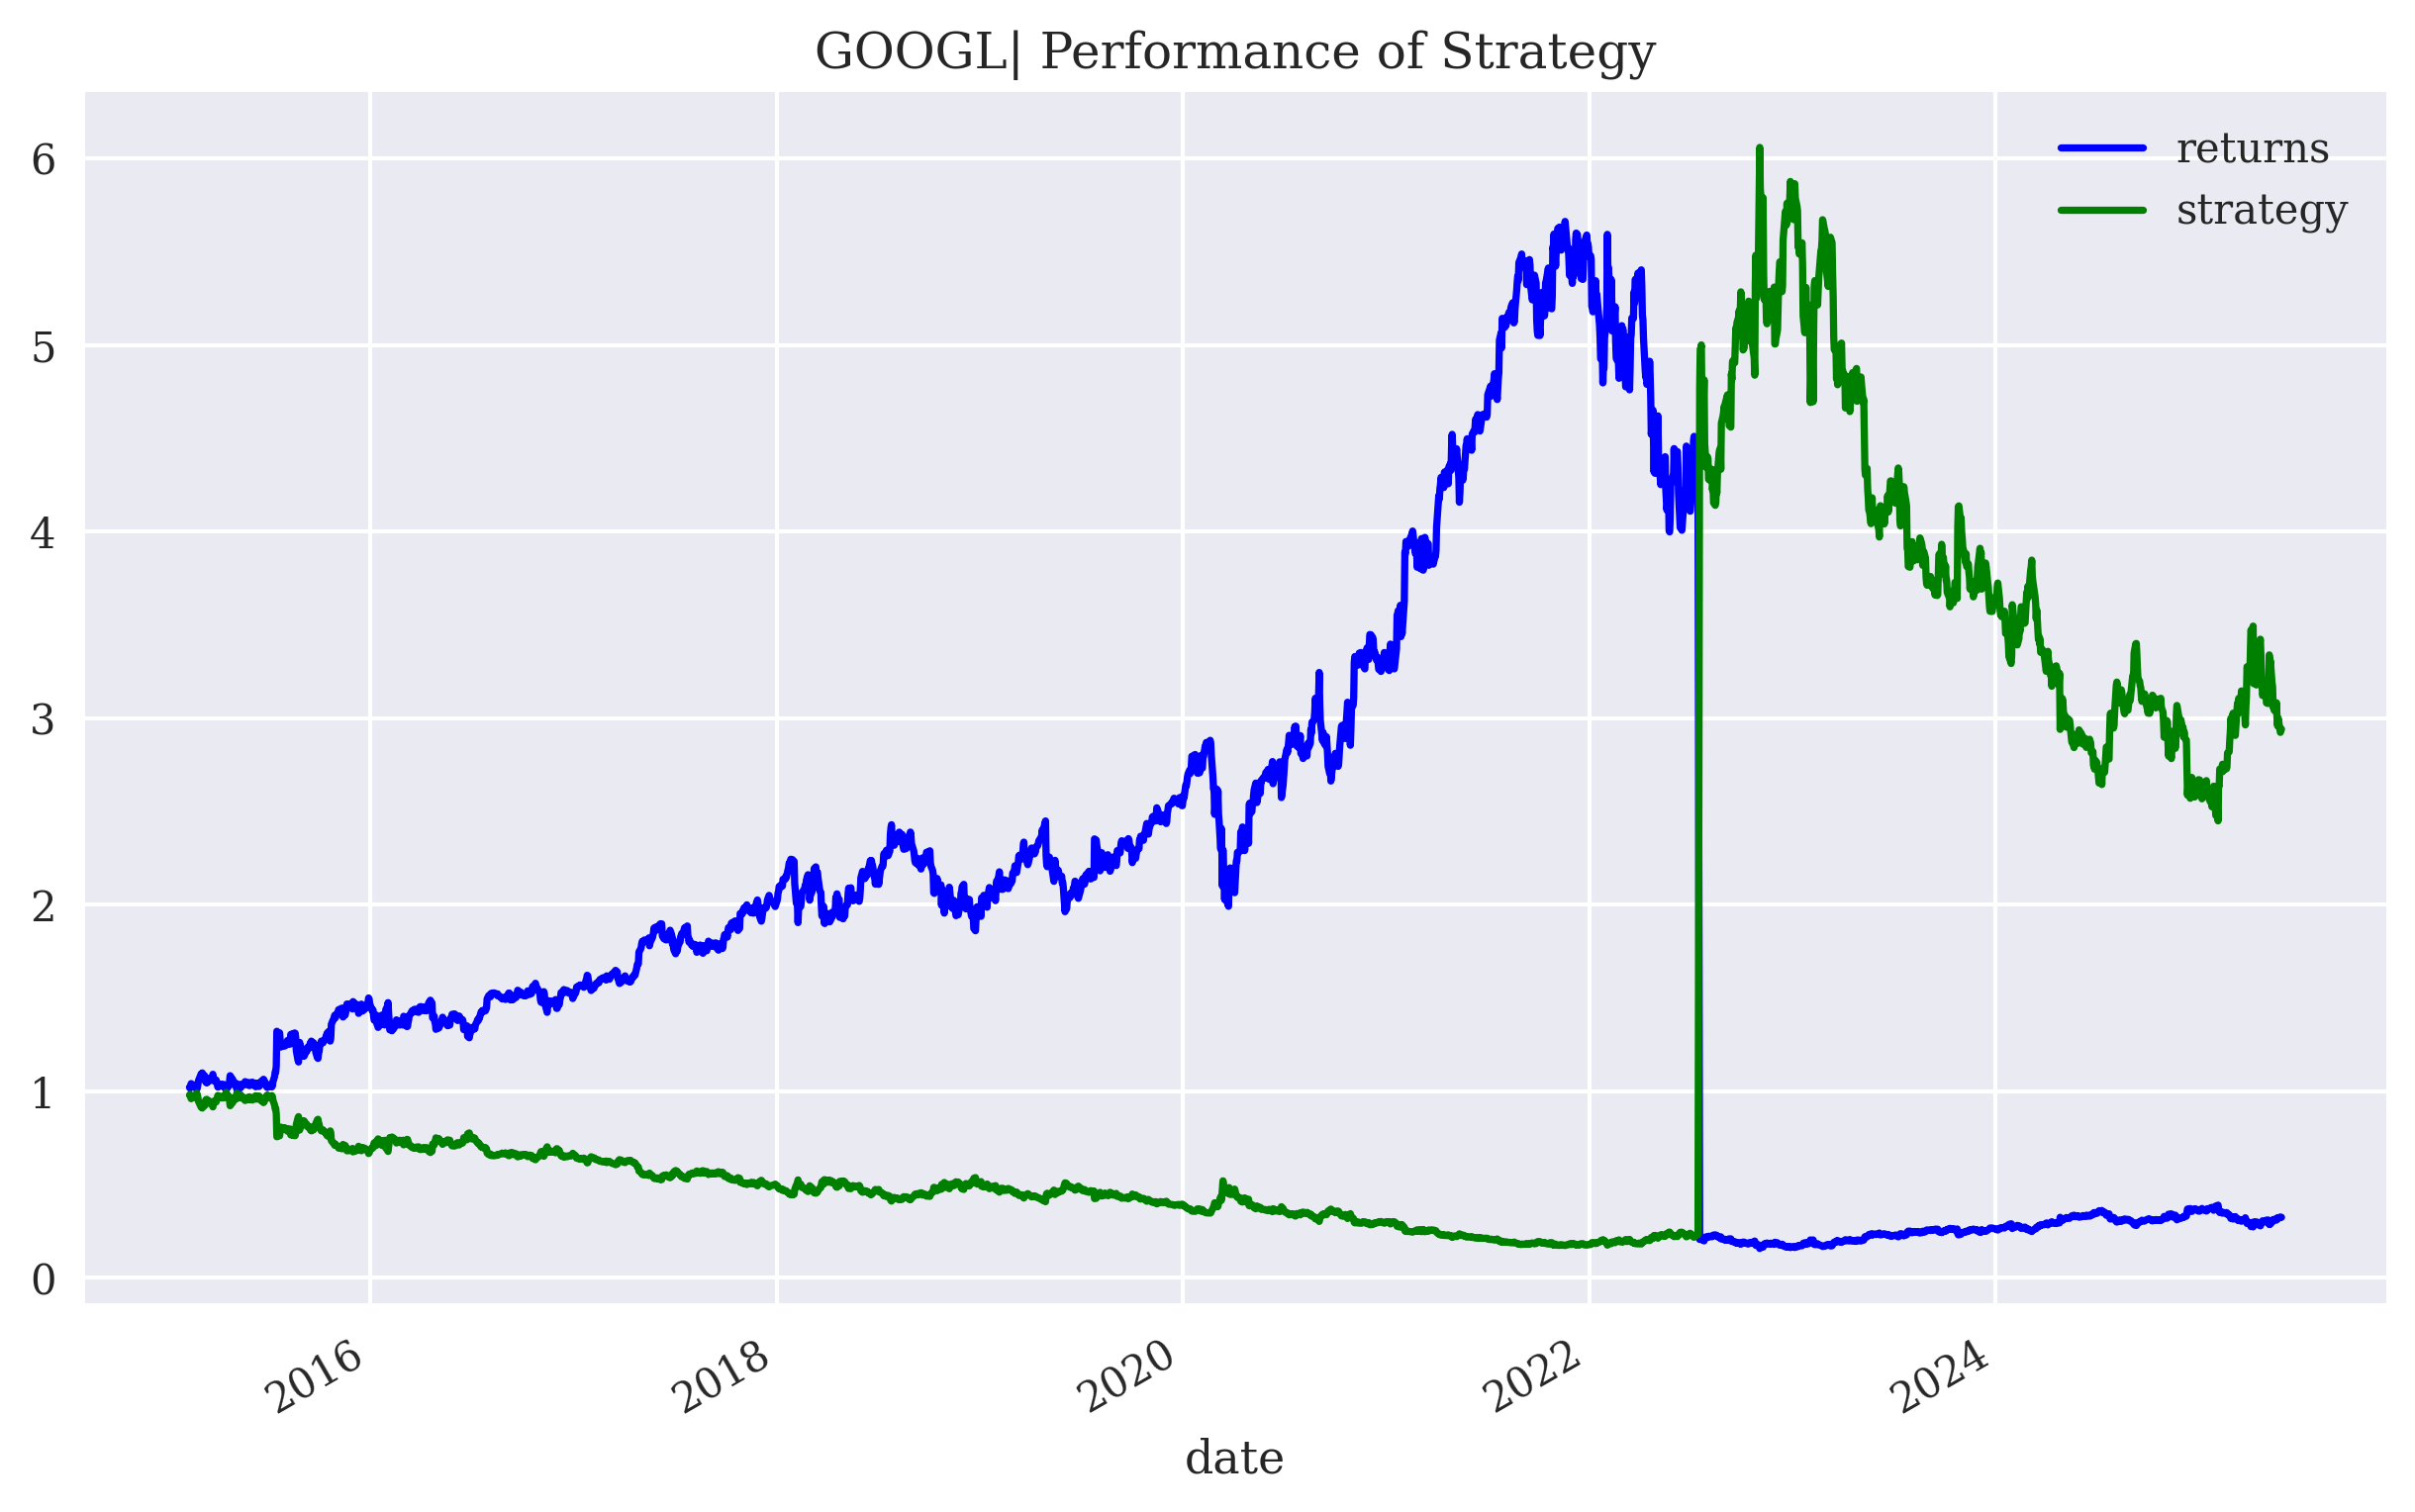

In [16]:
agent.test_agent()

## Performance Plots

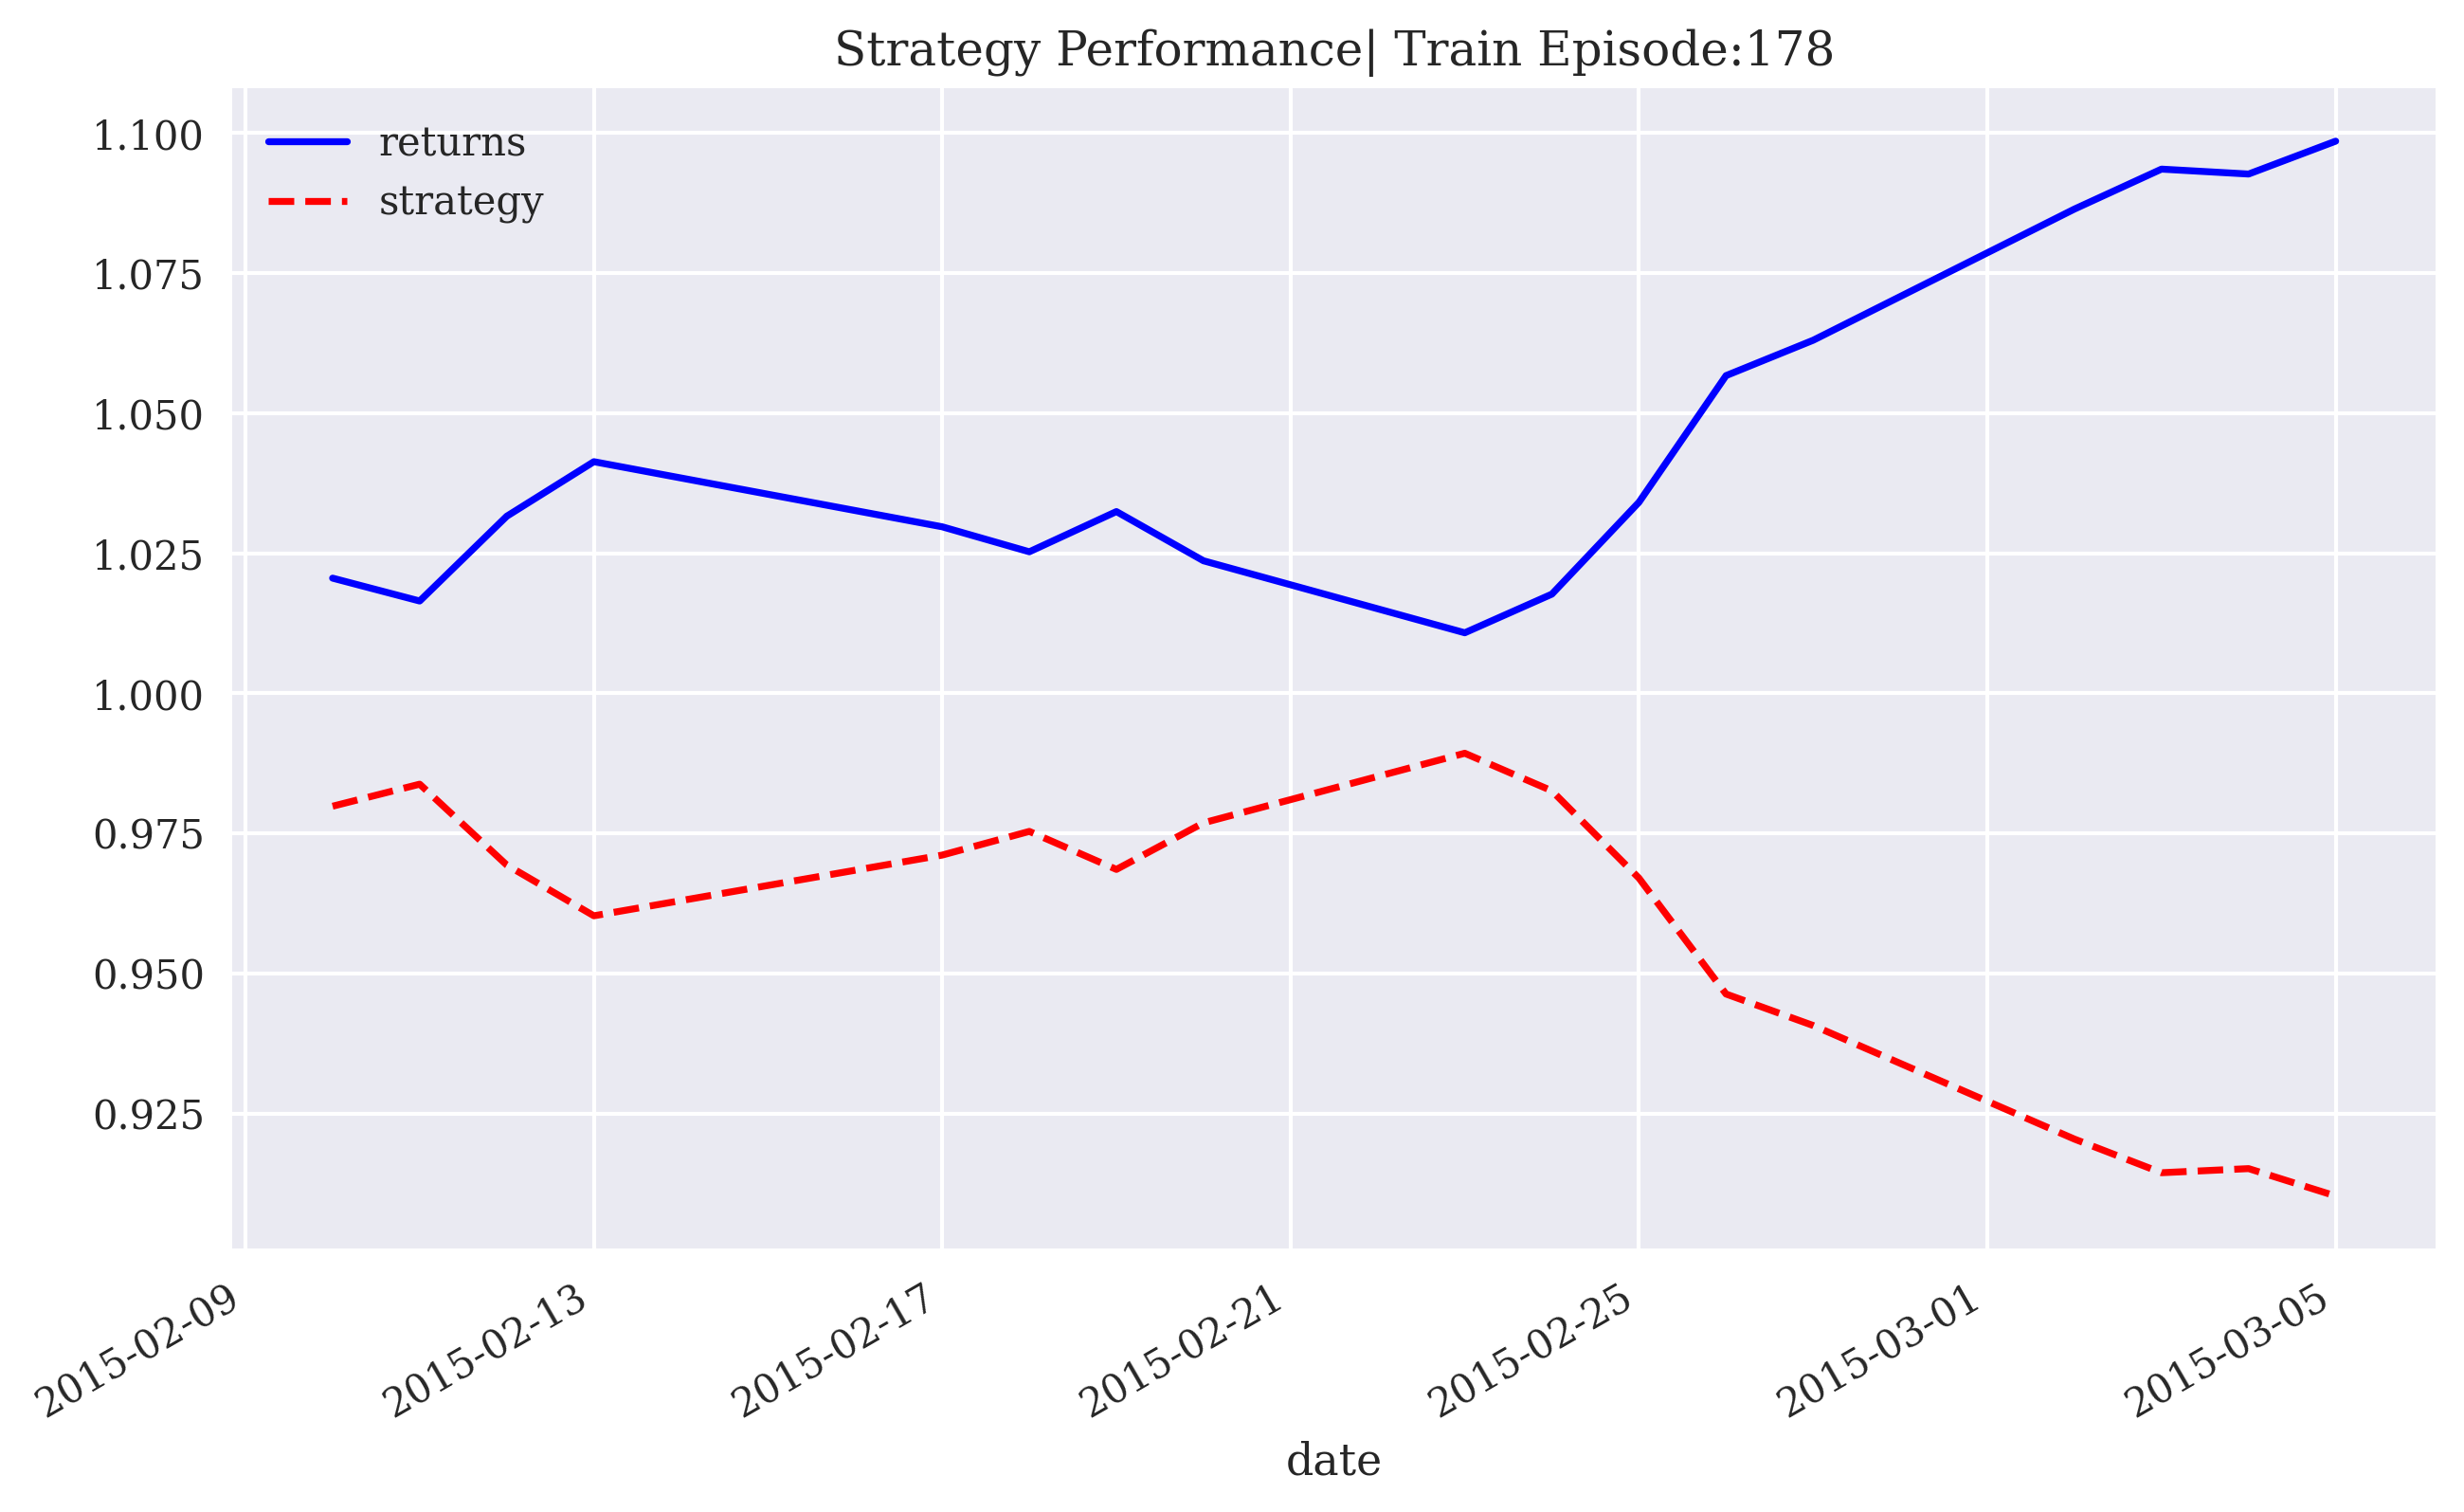

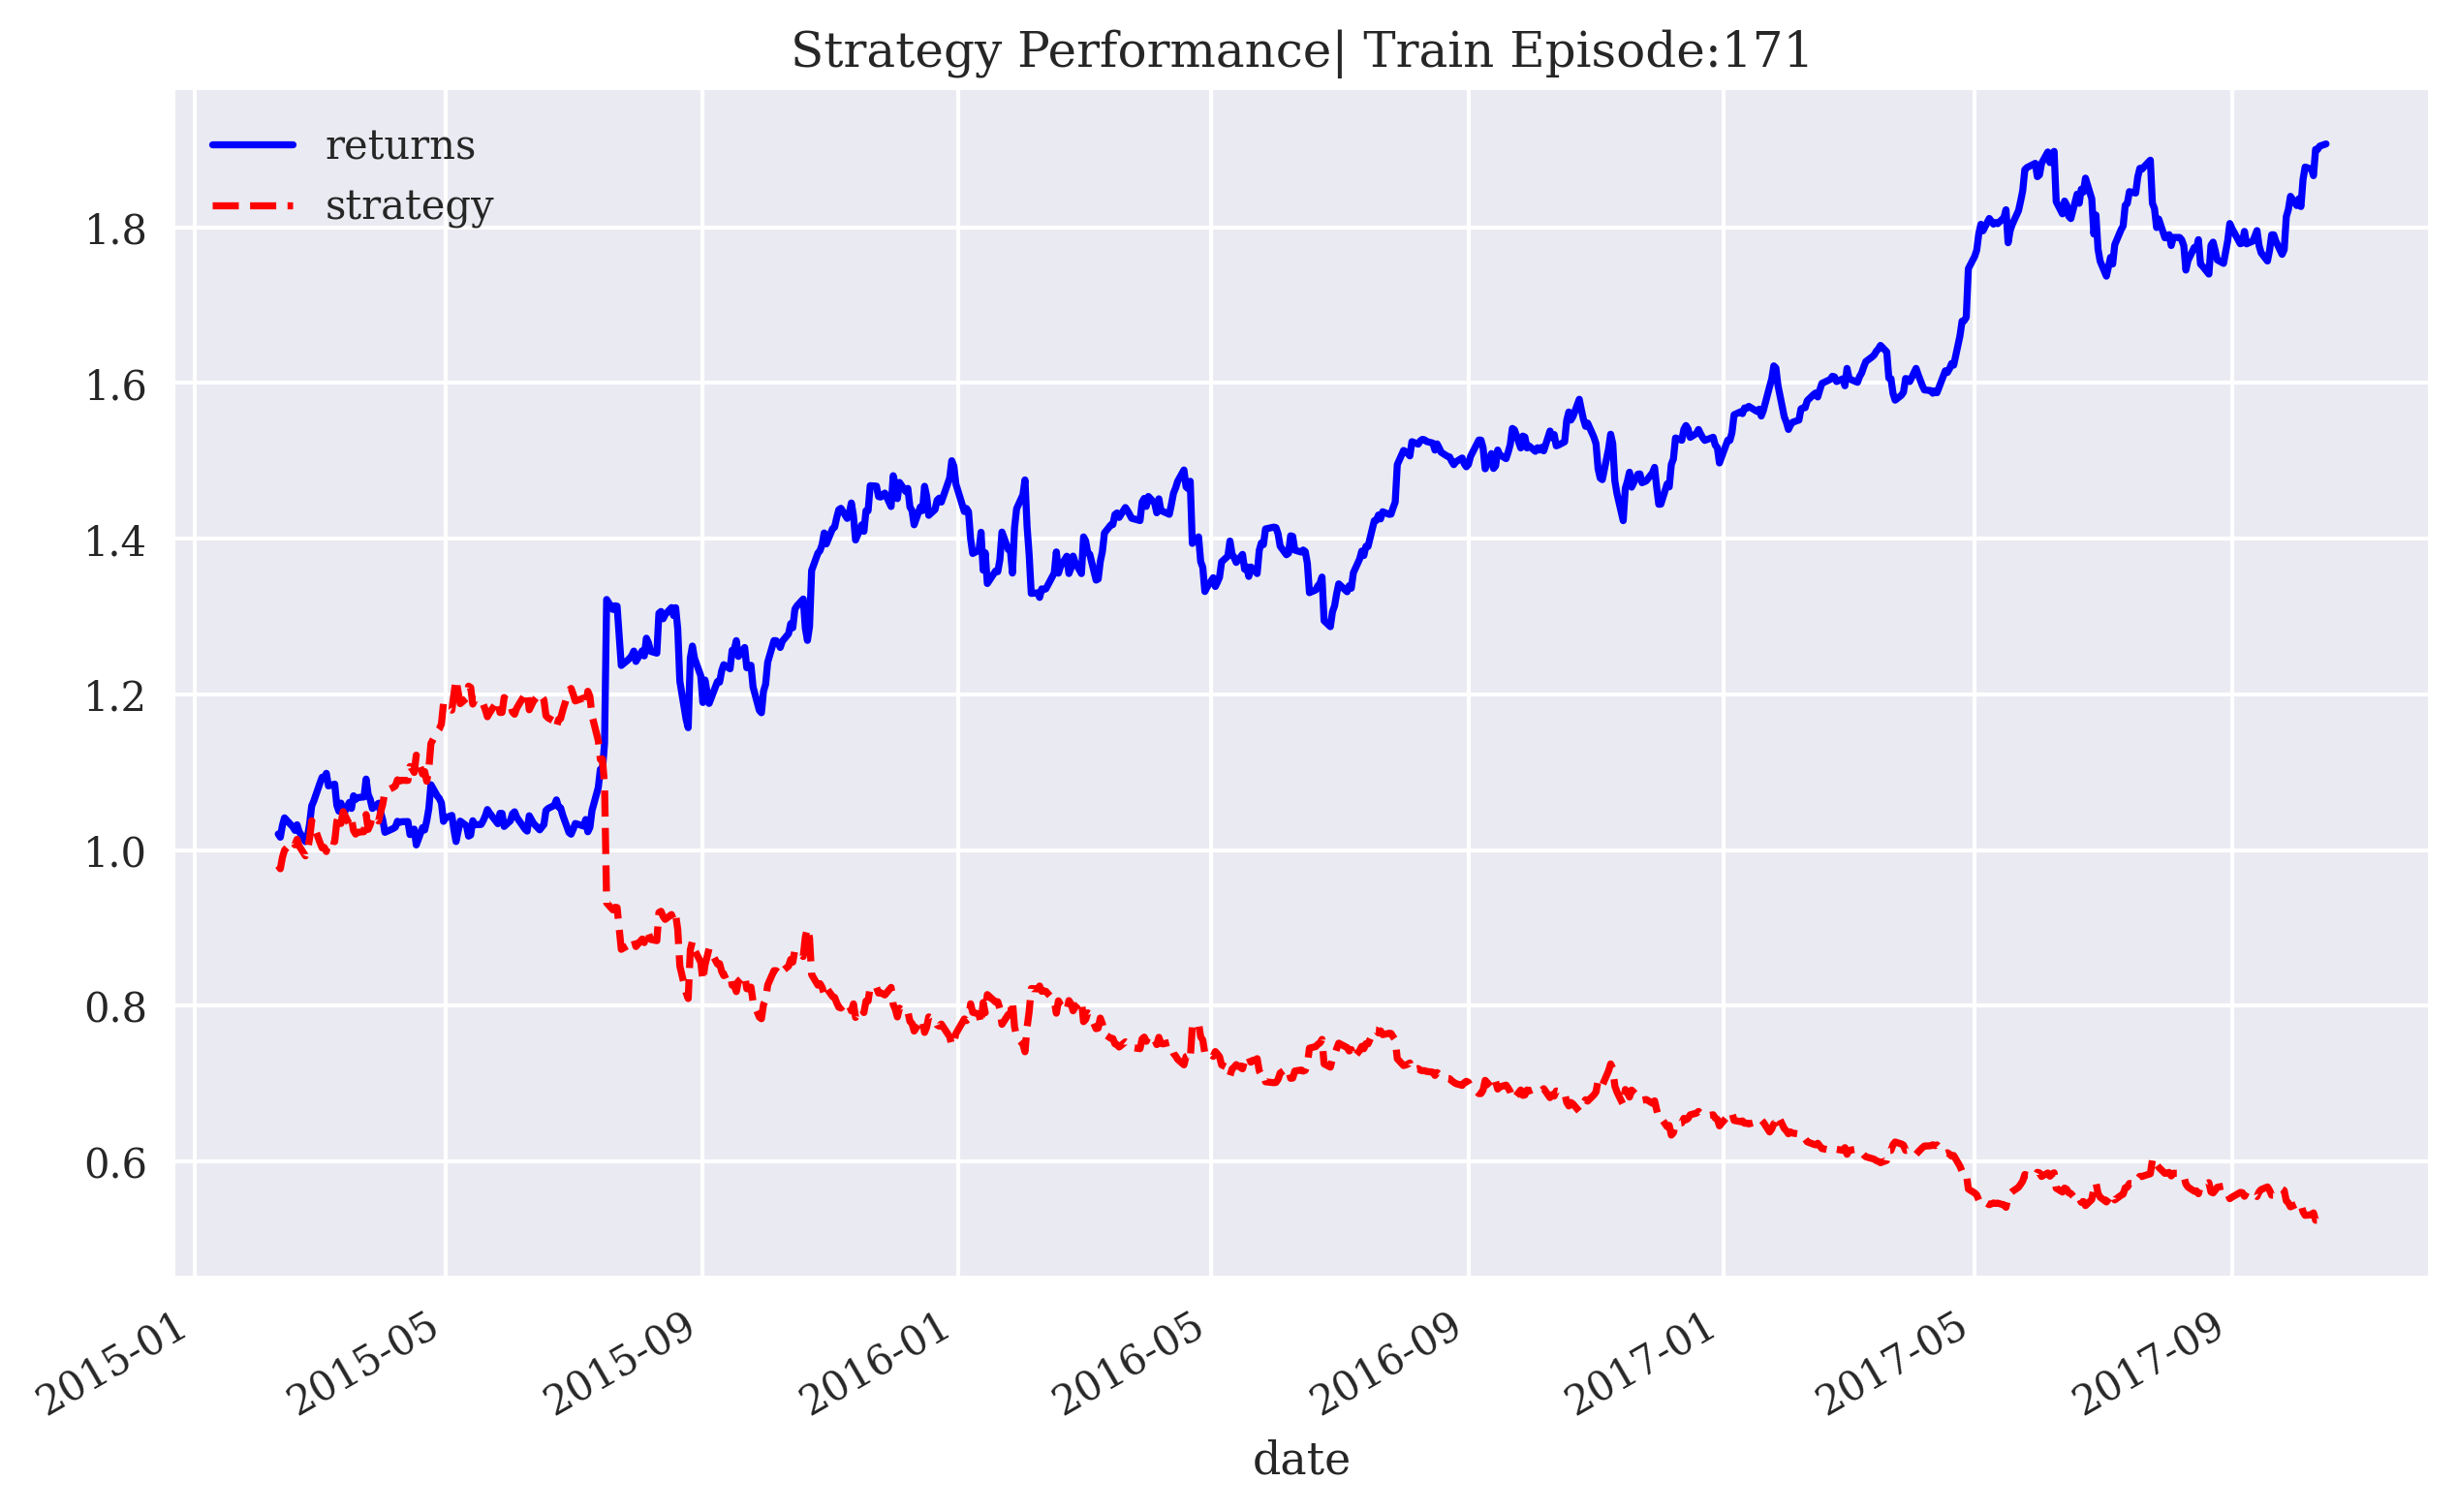

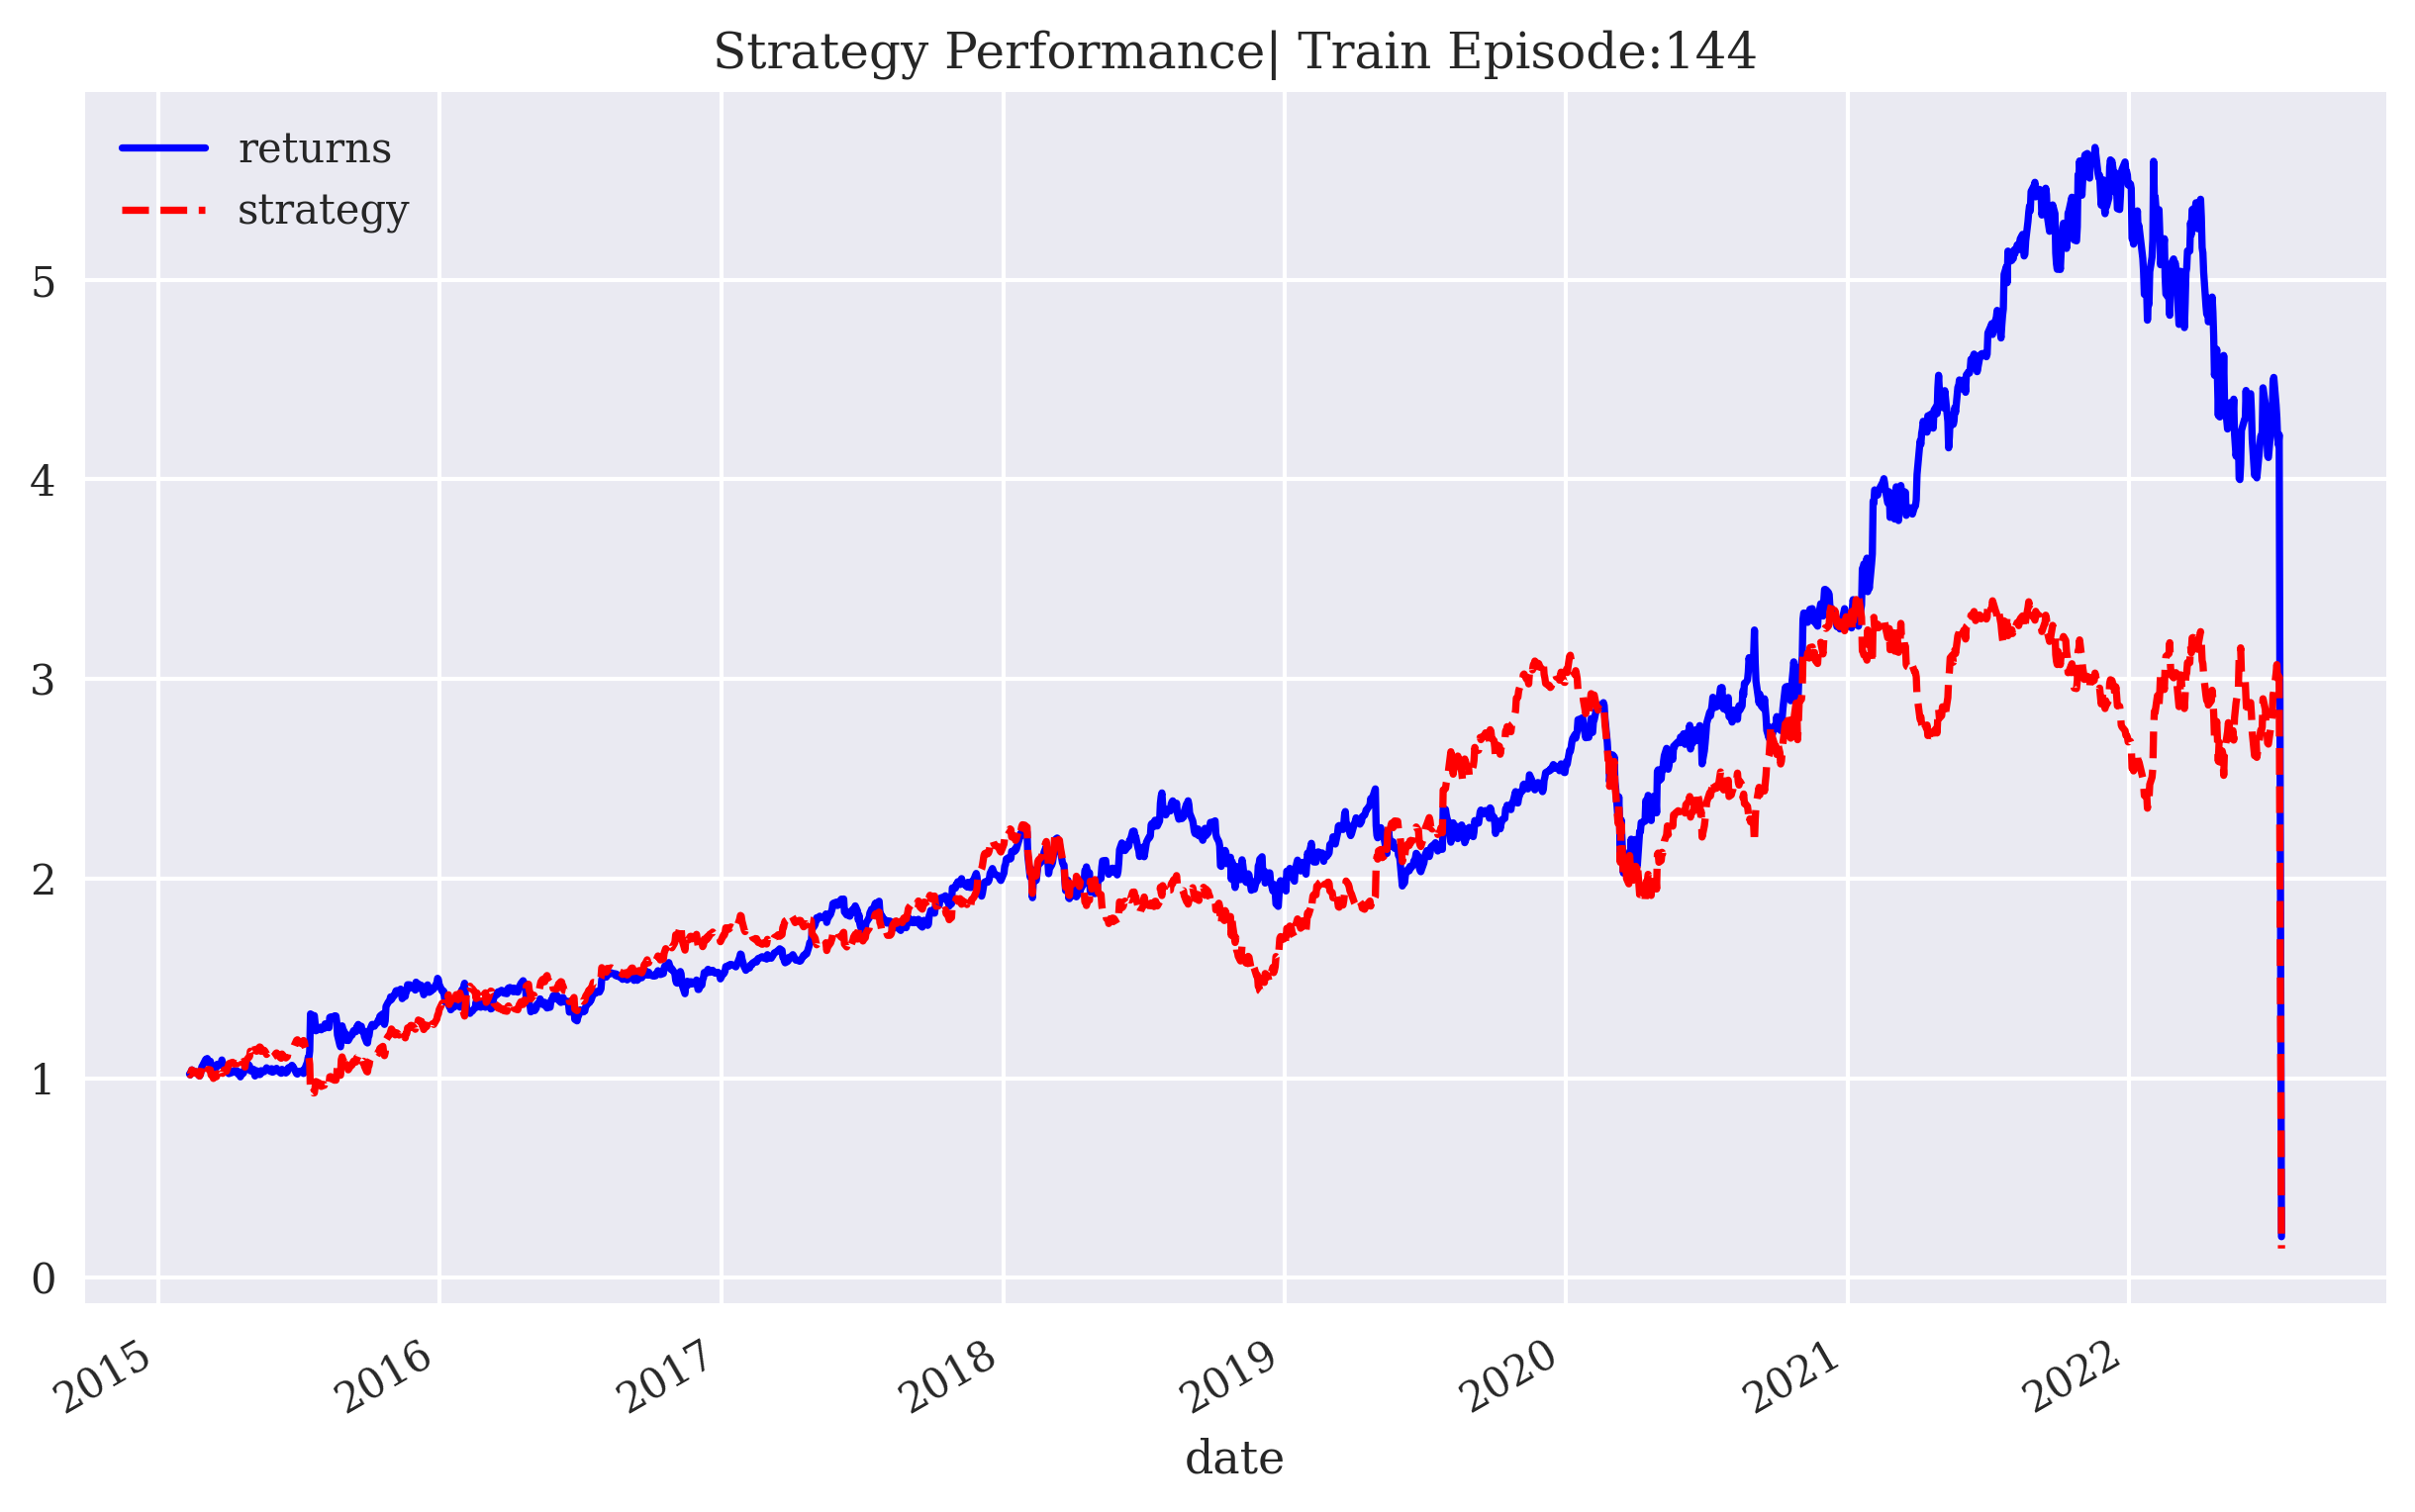

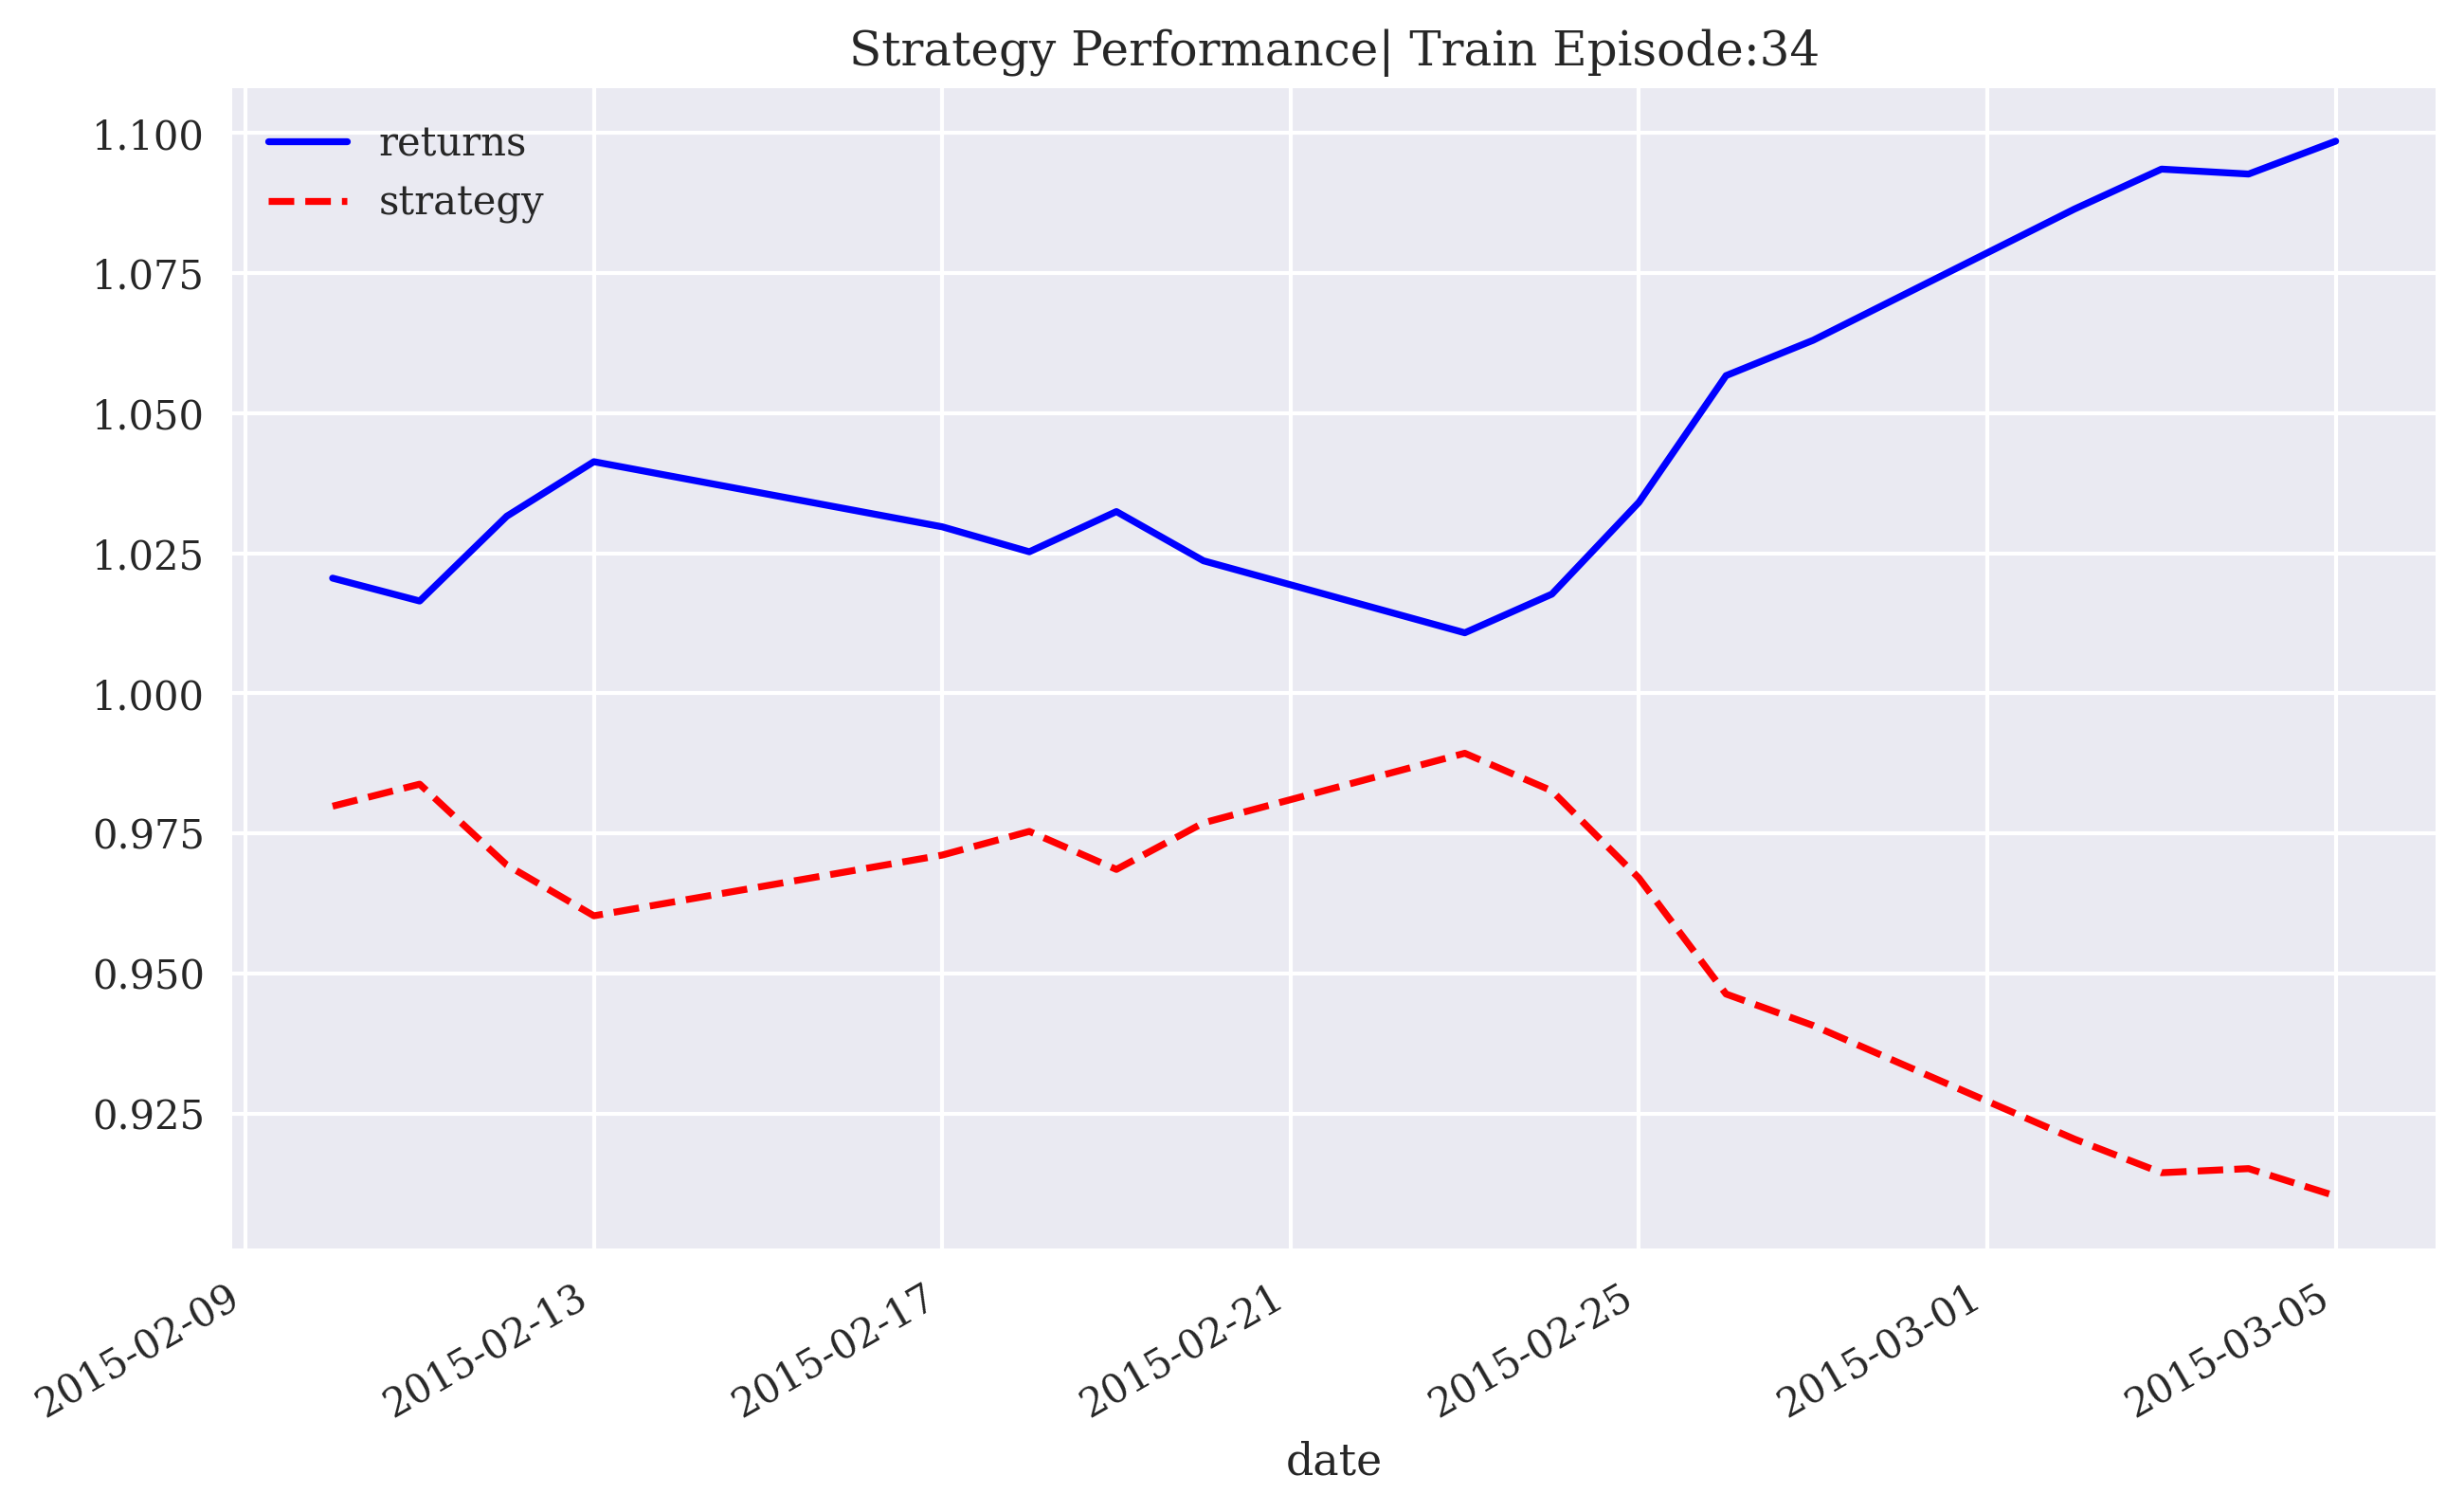

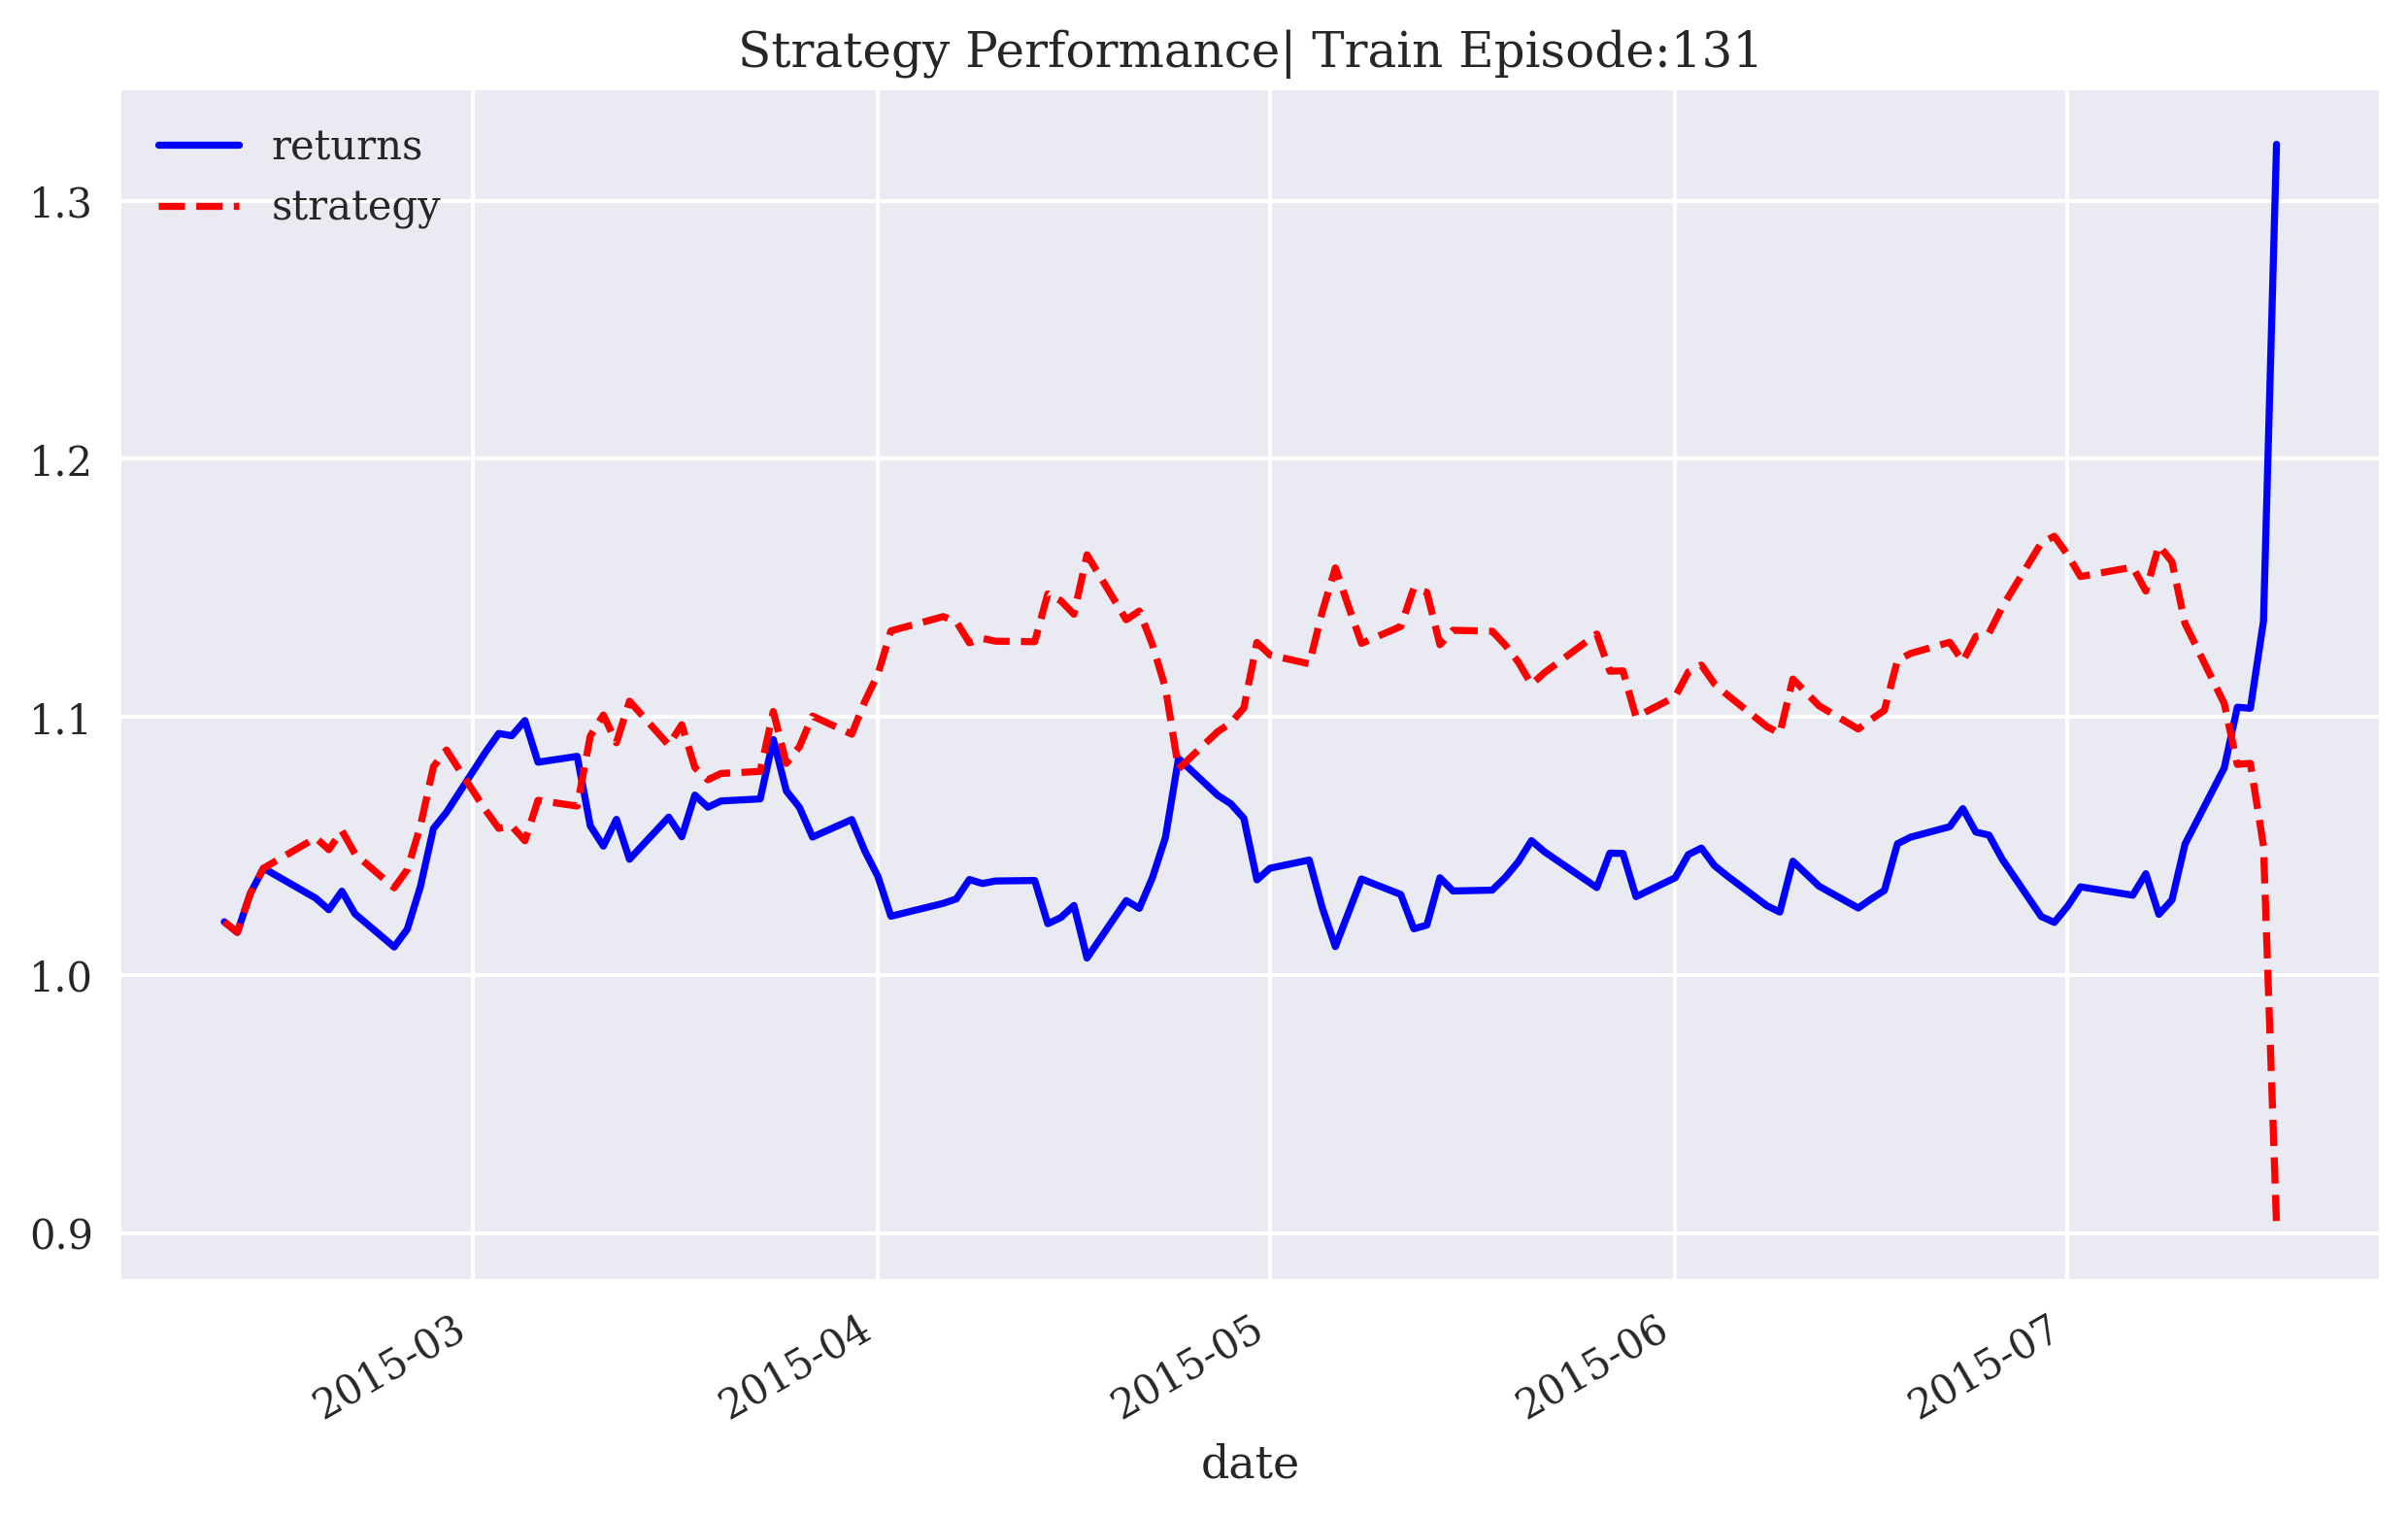

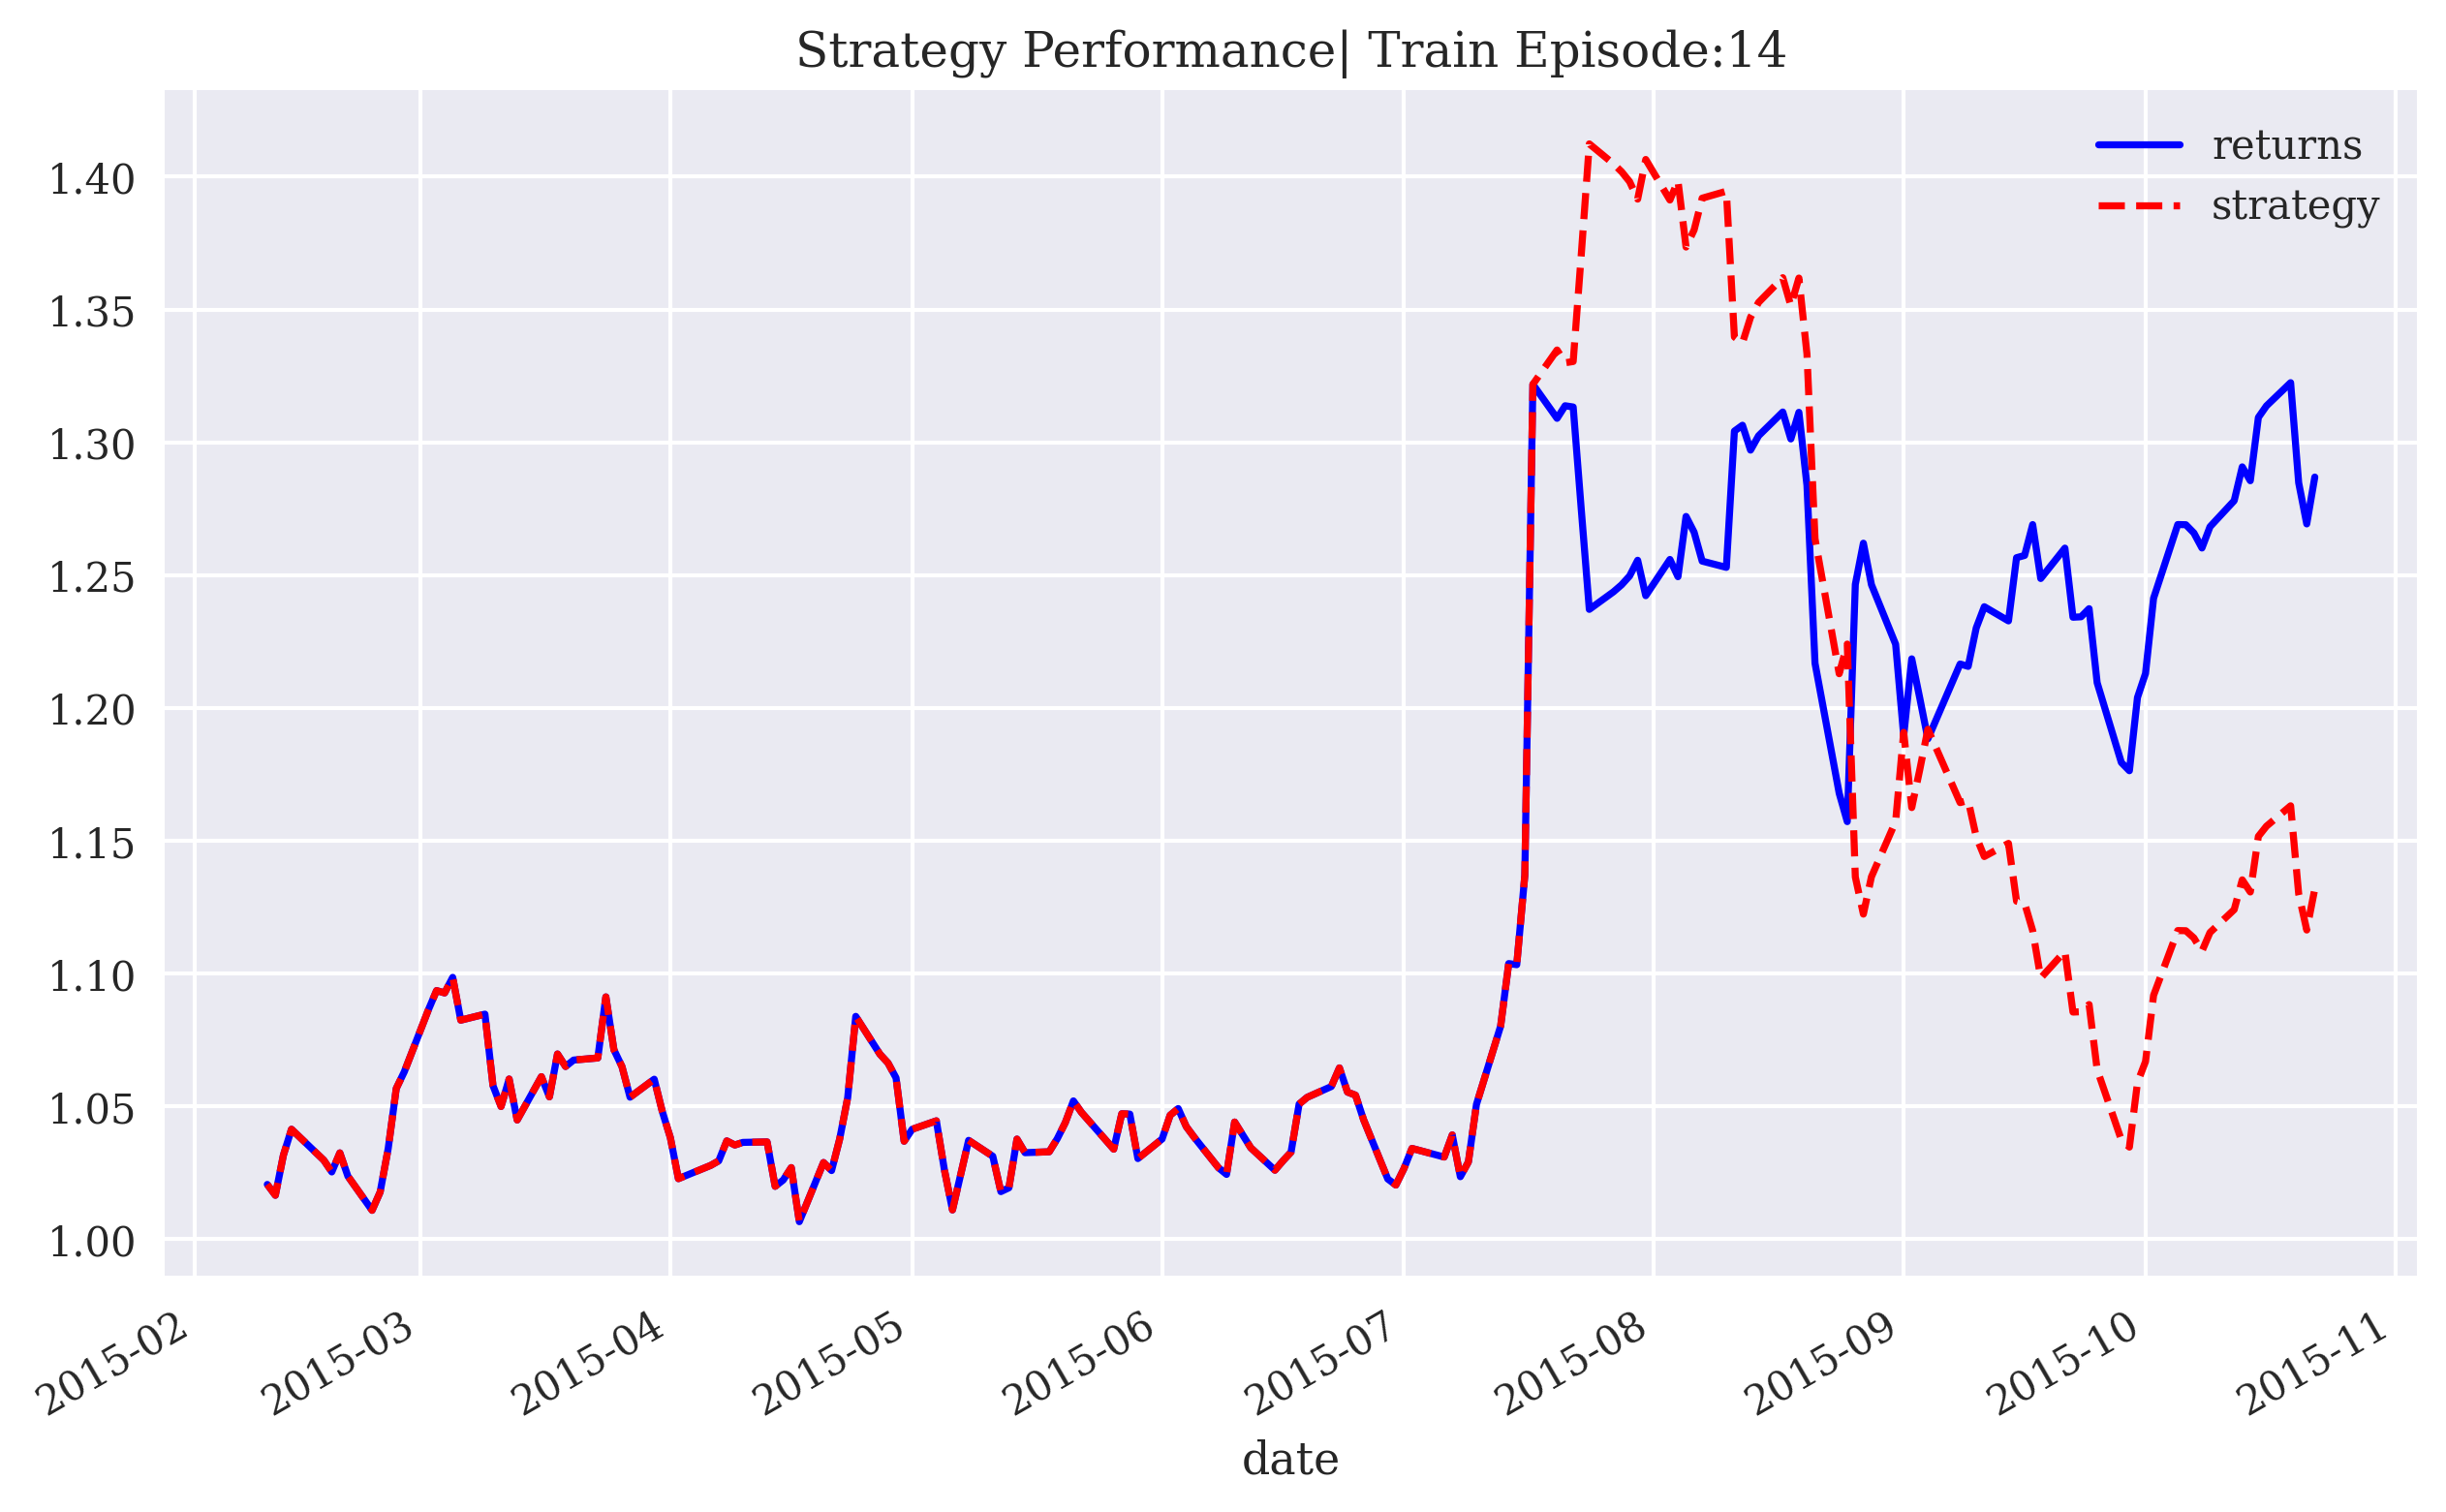

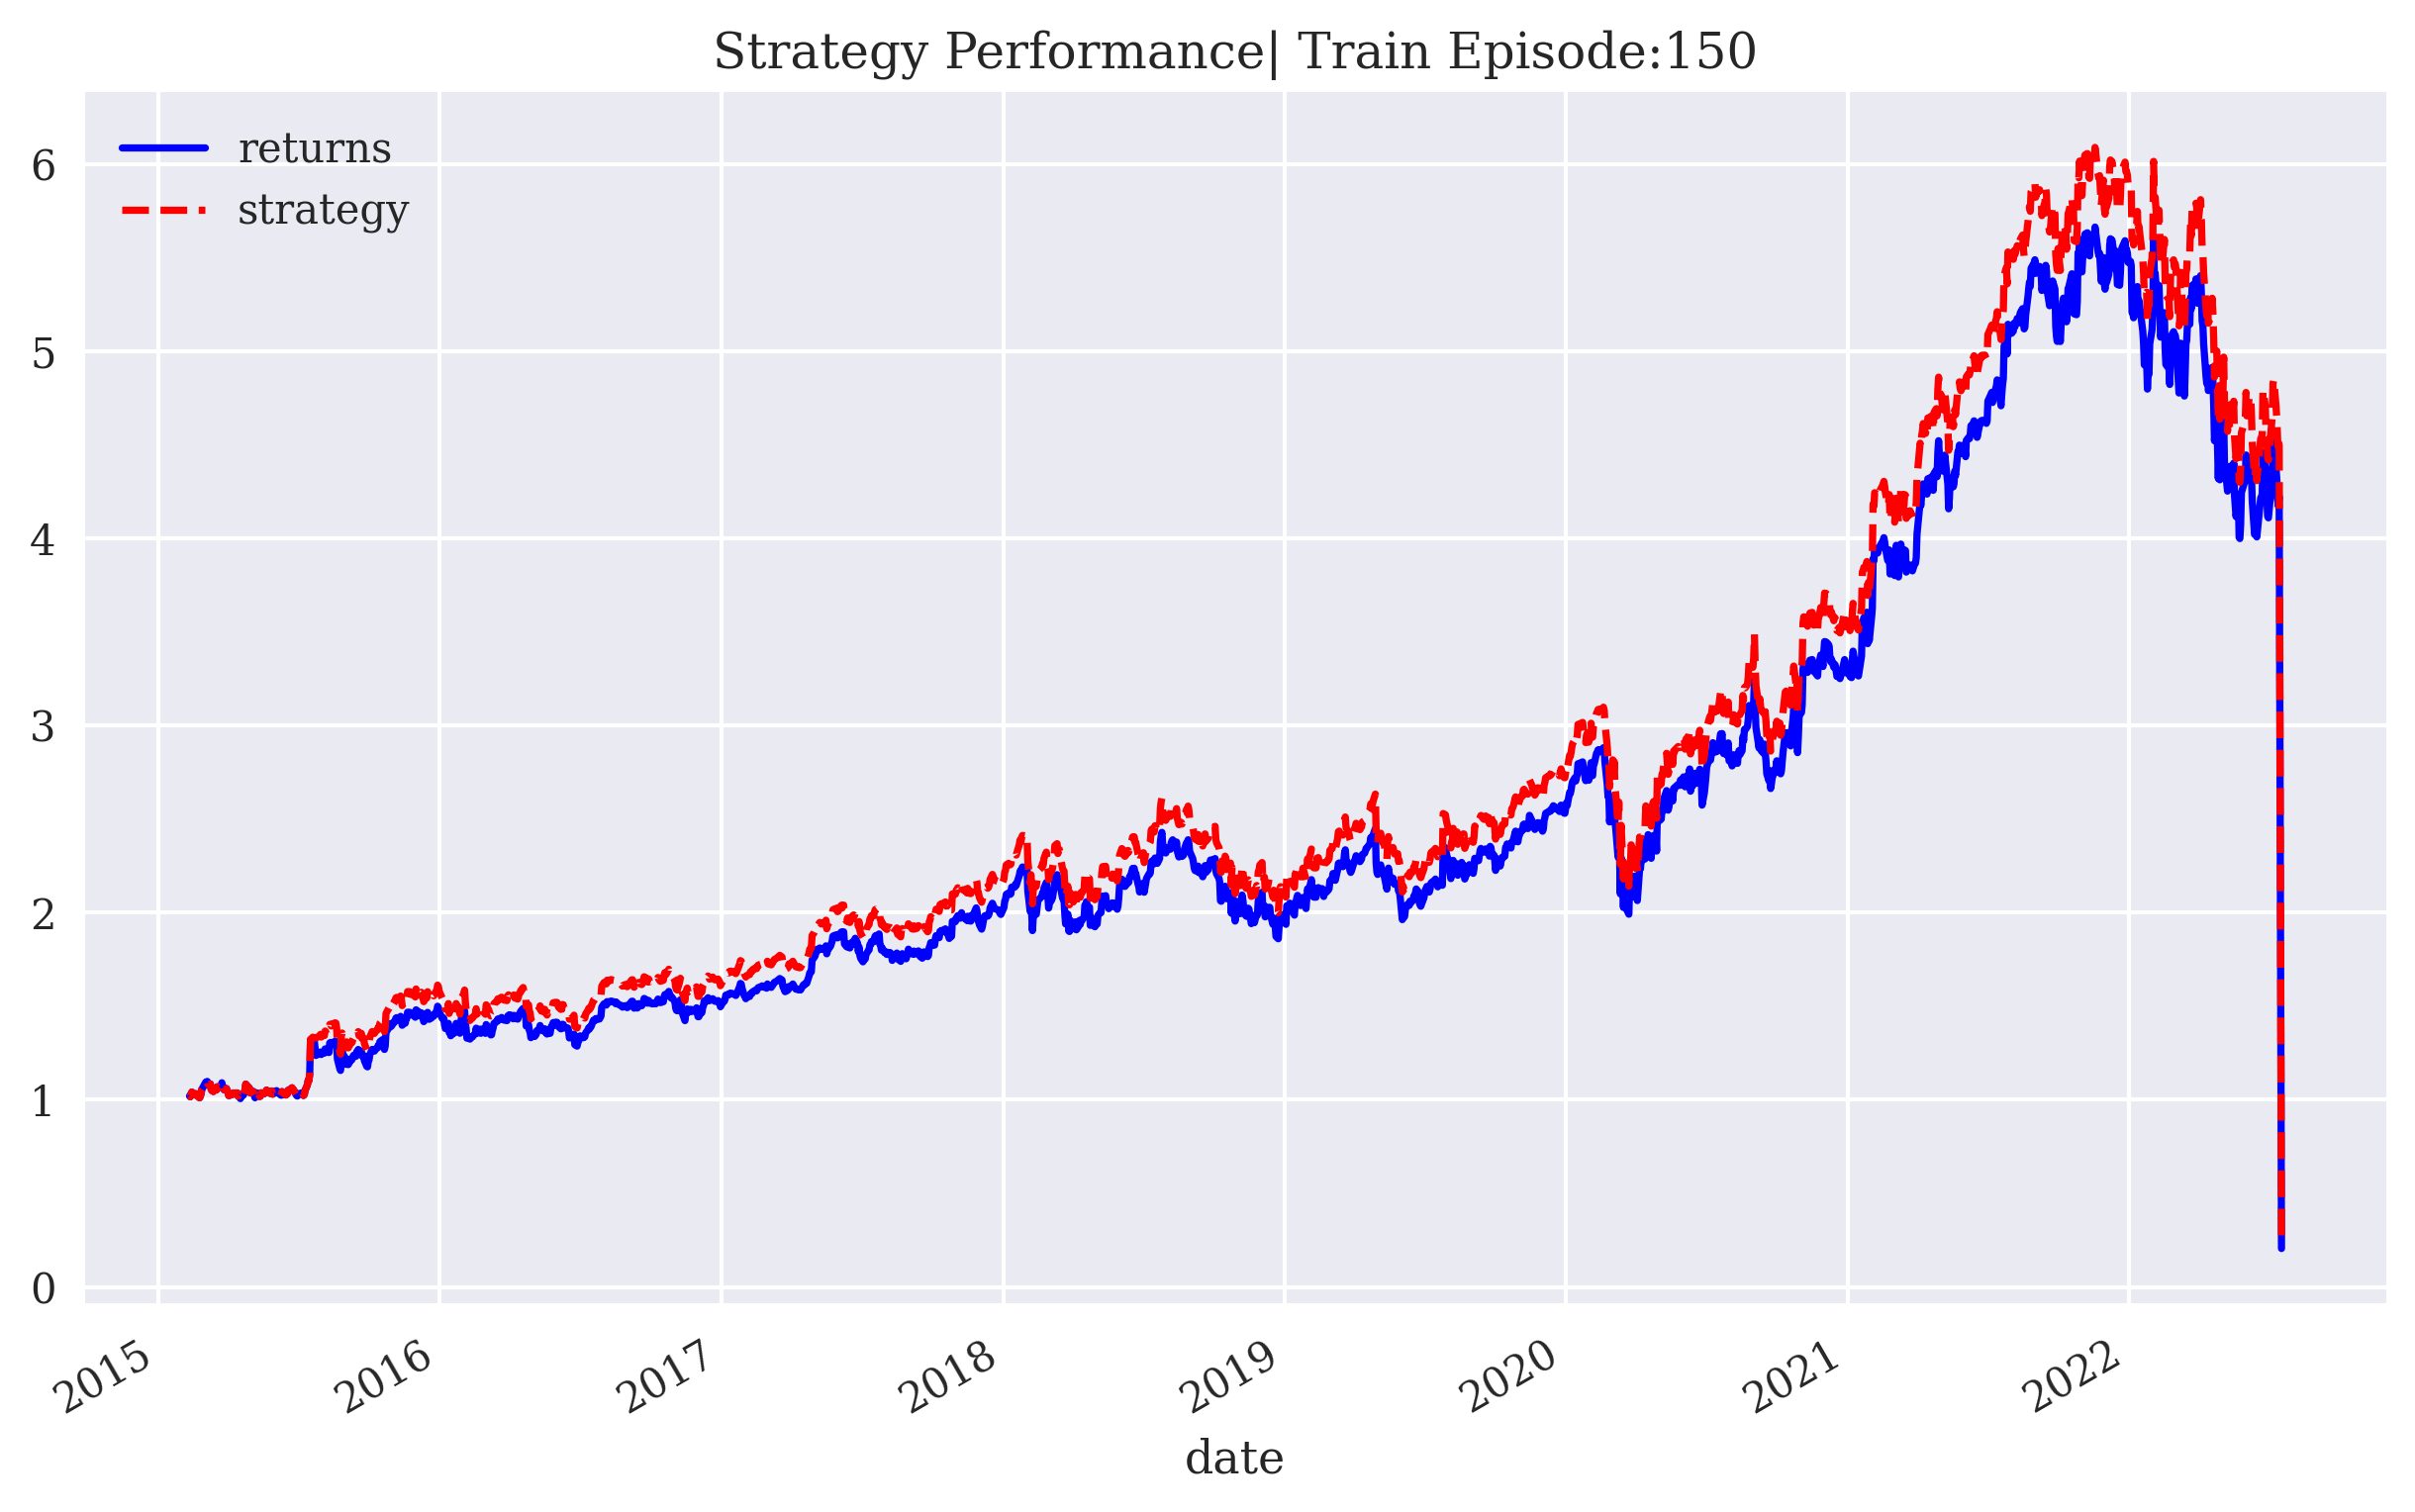

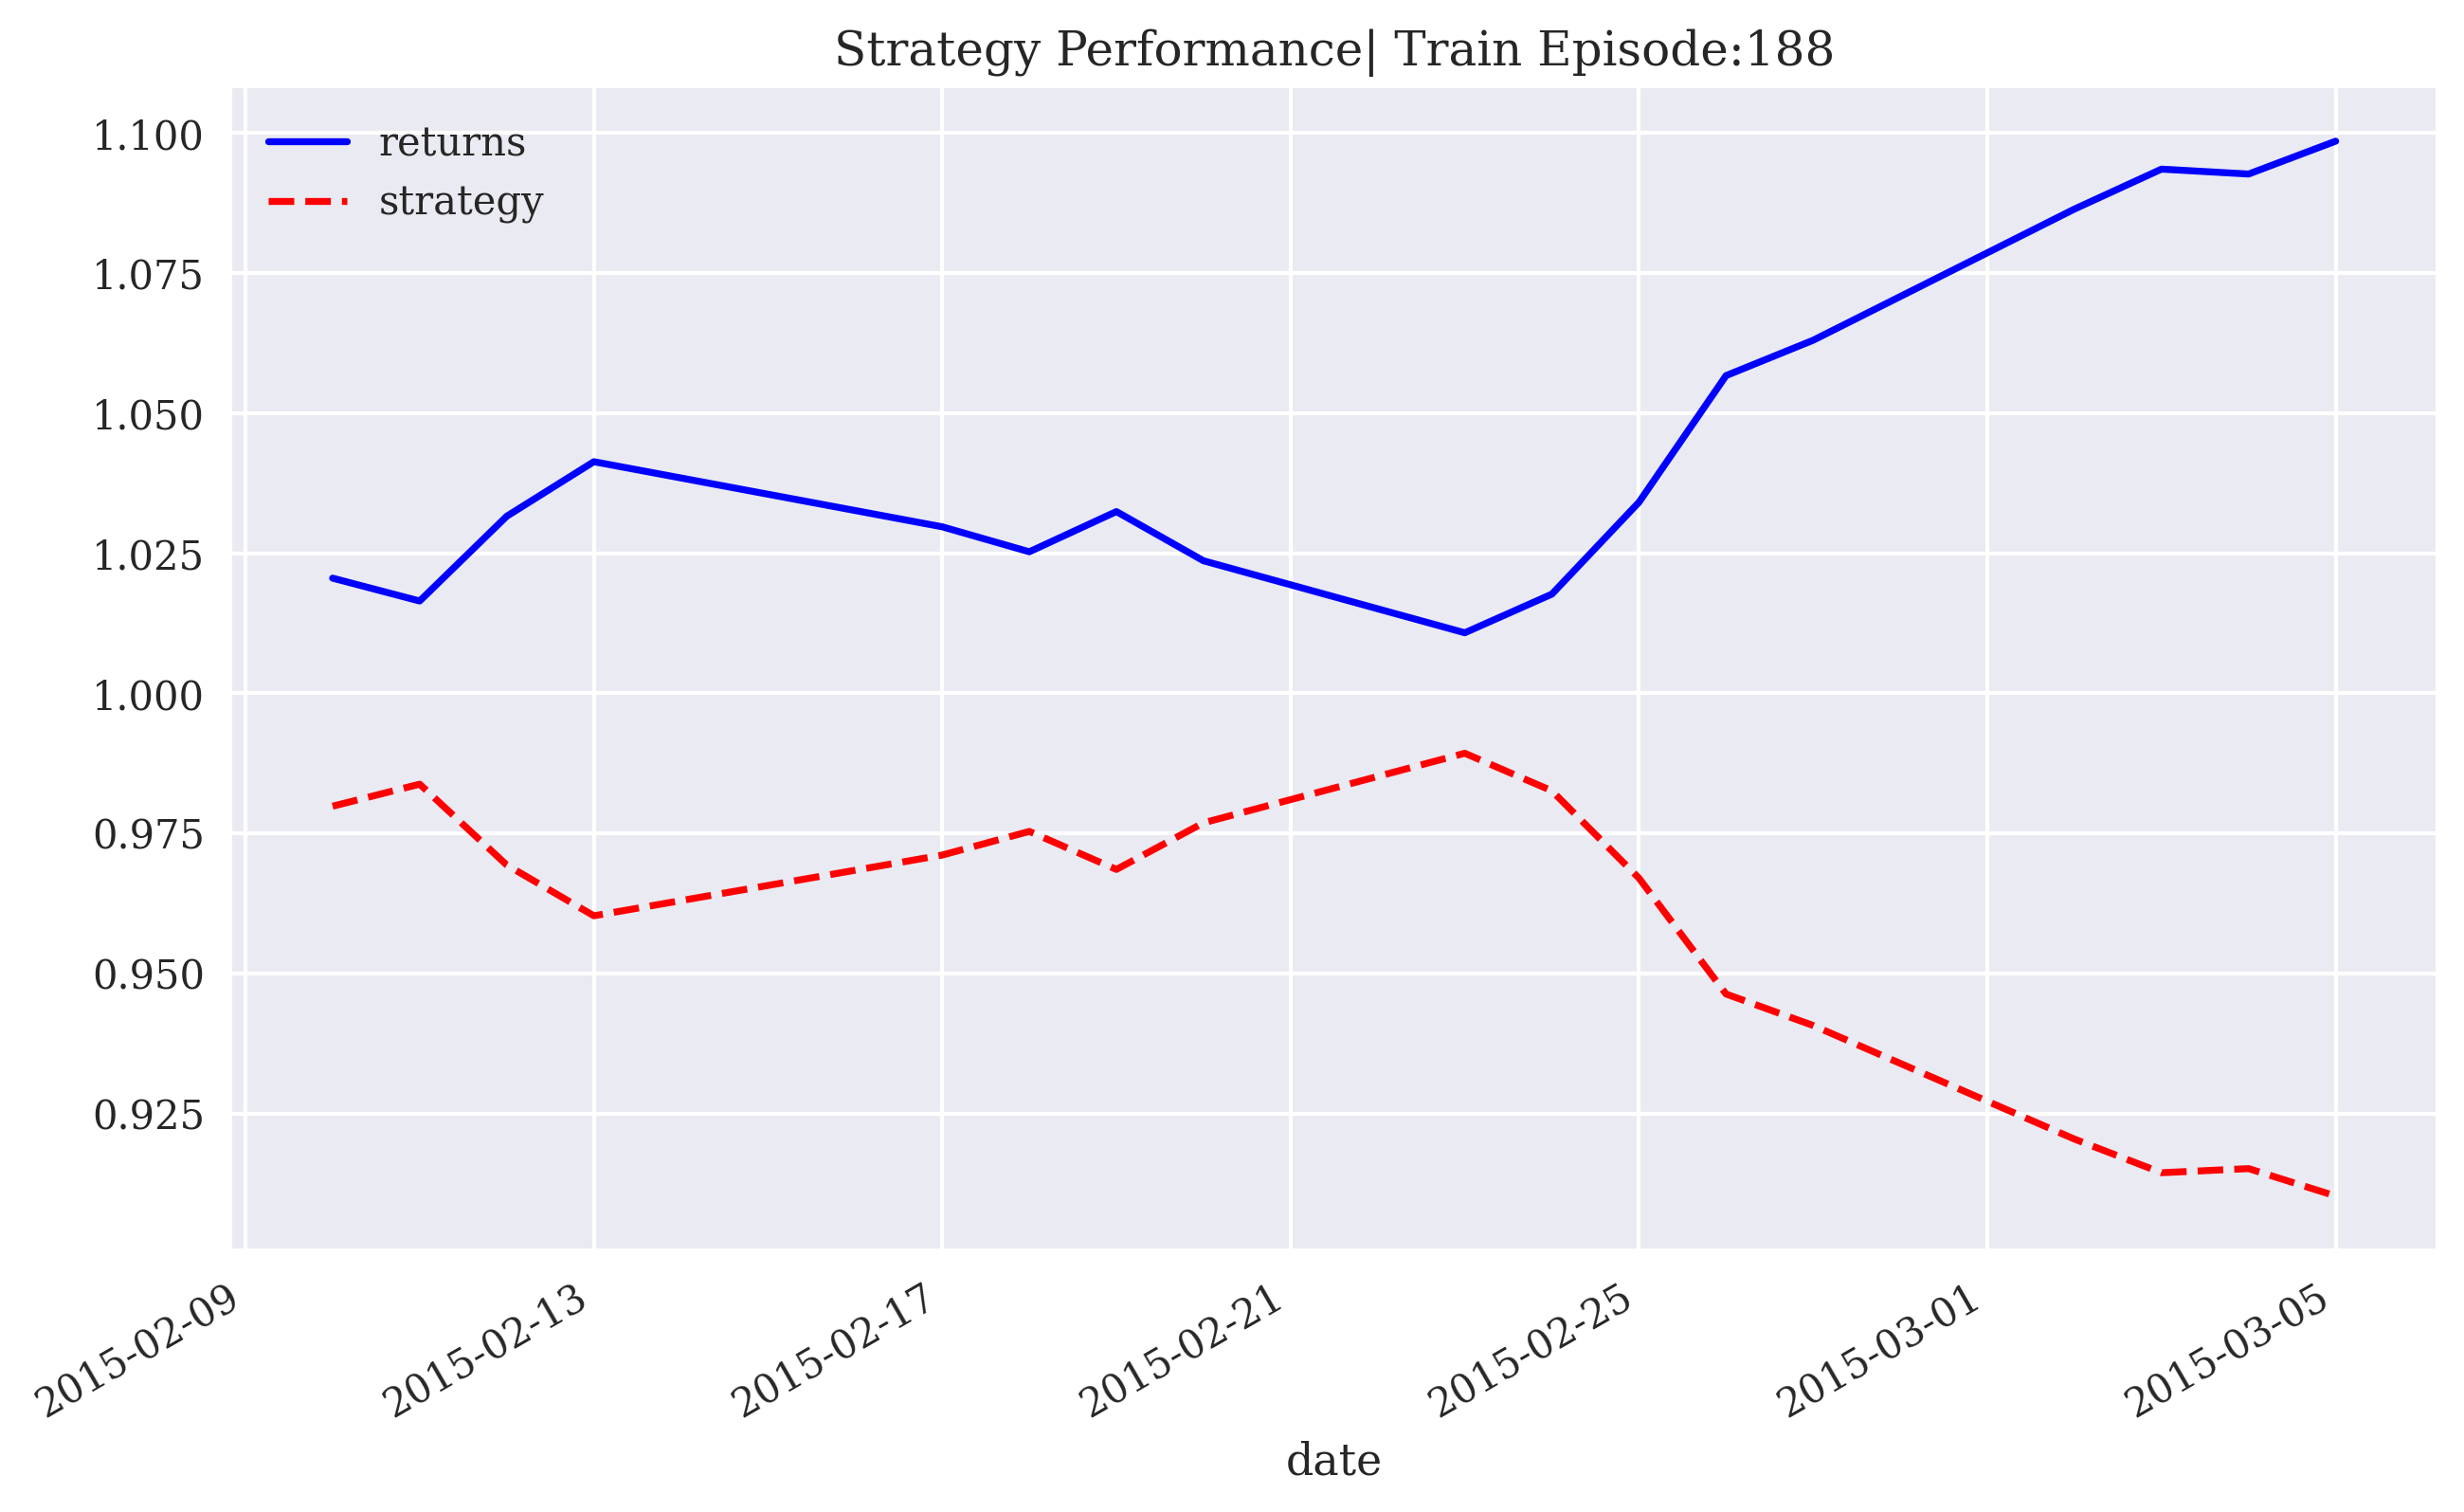

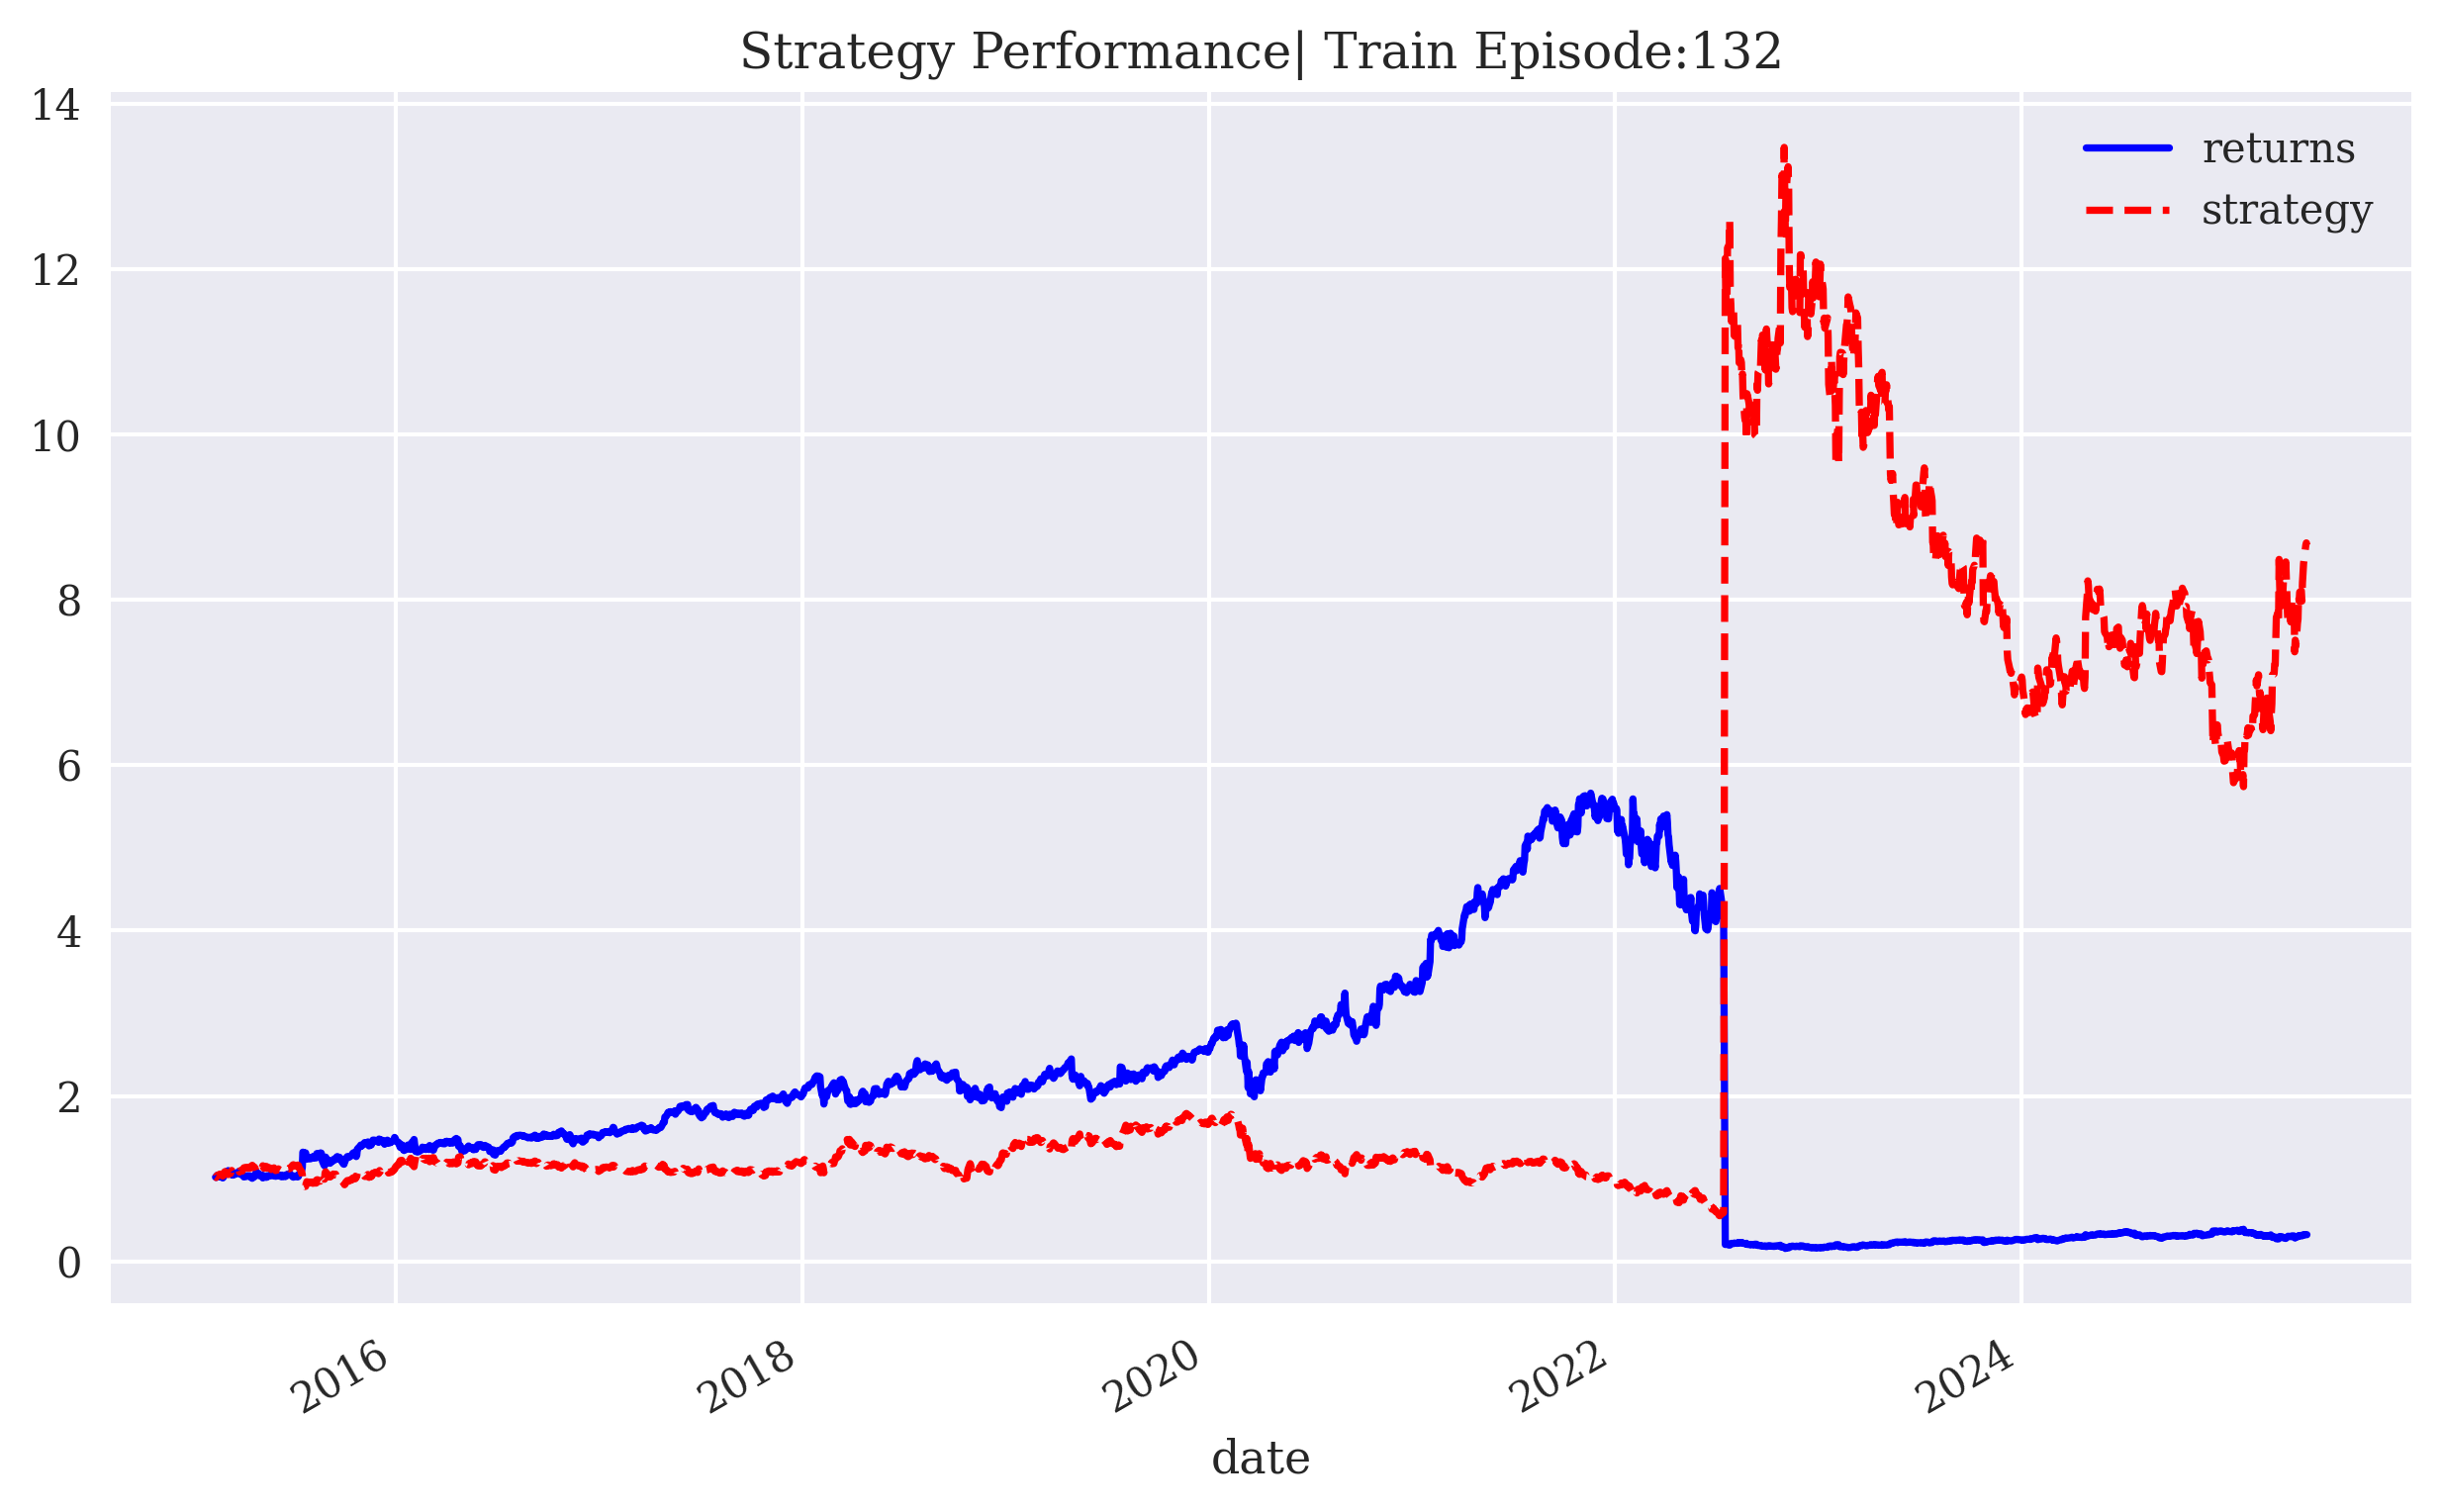

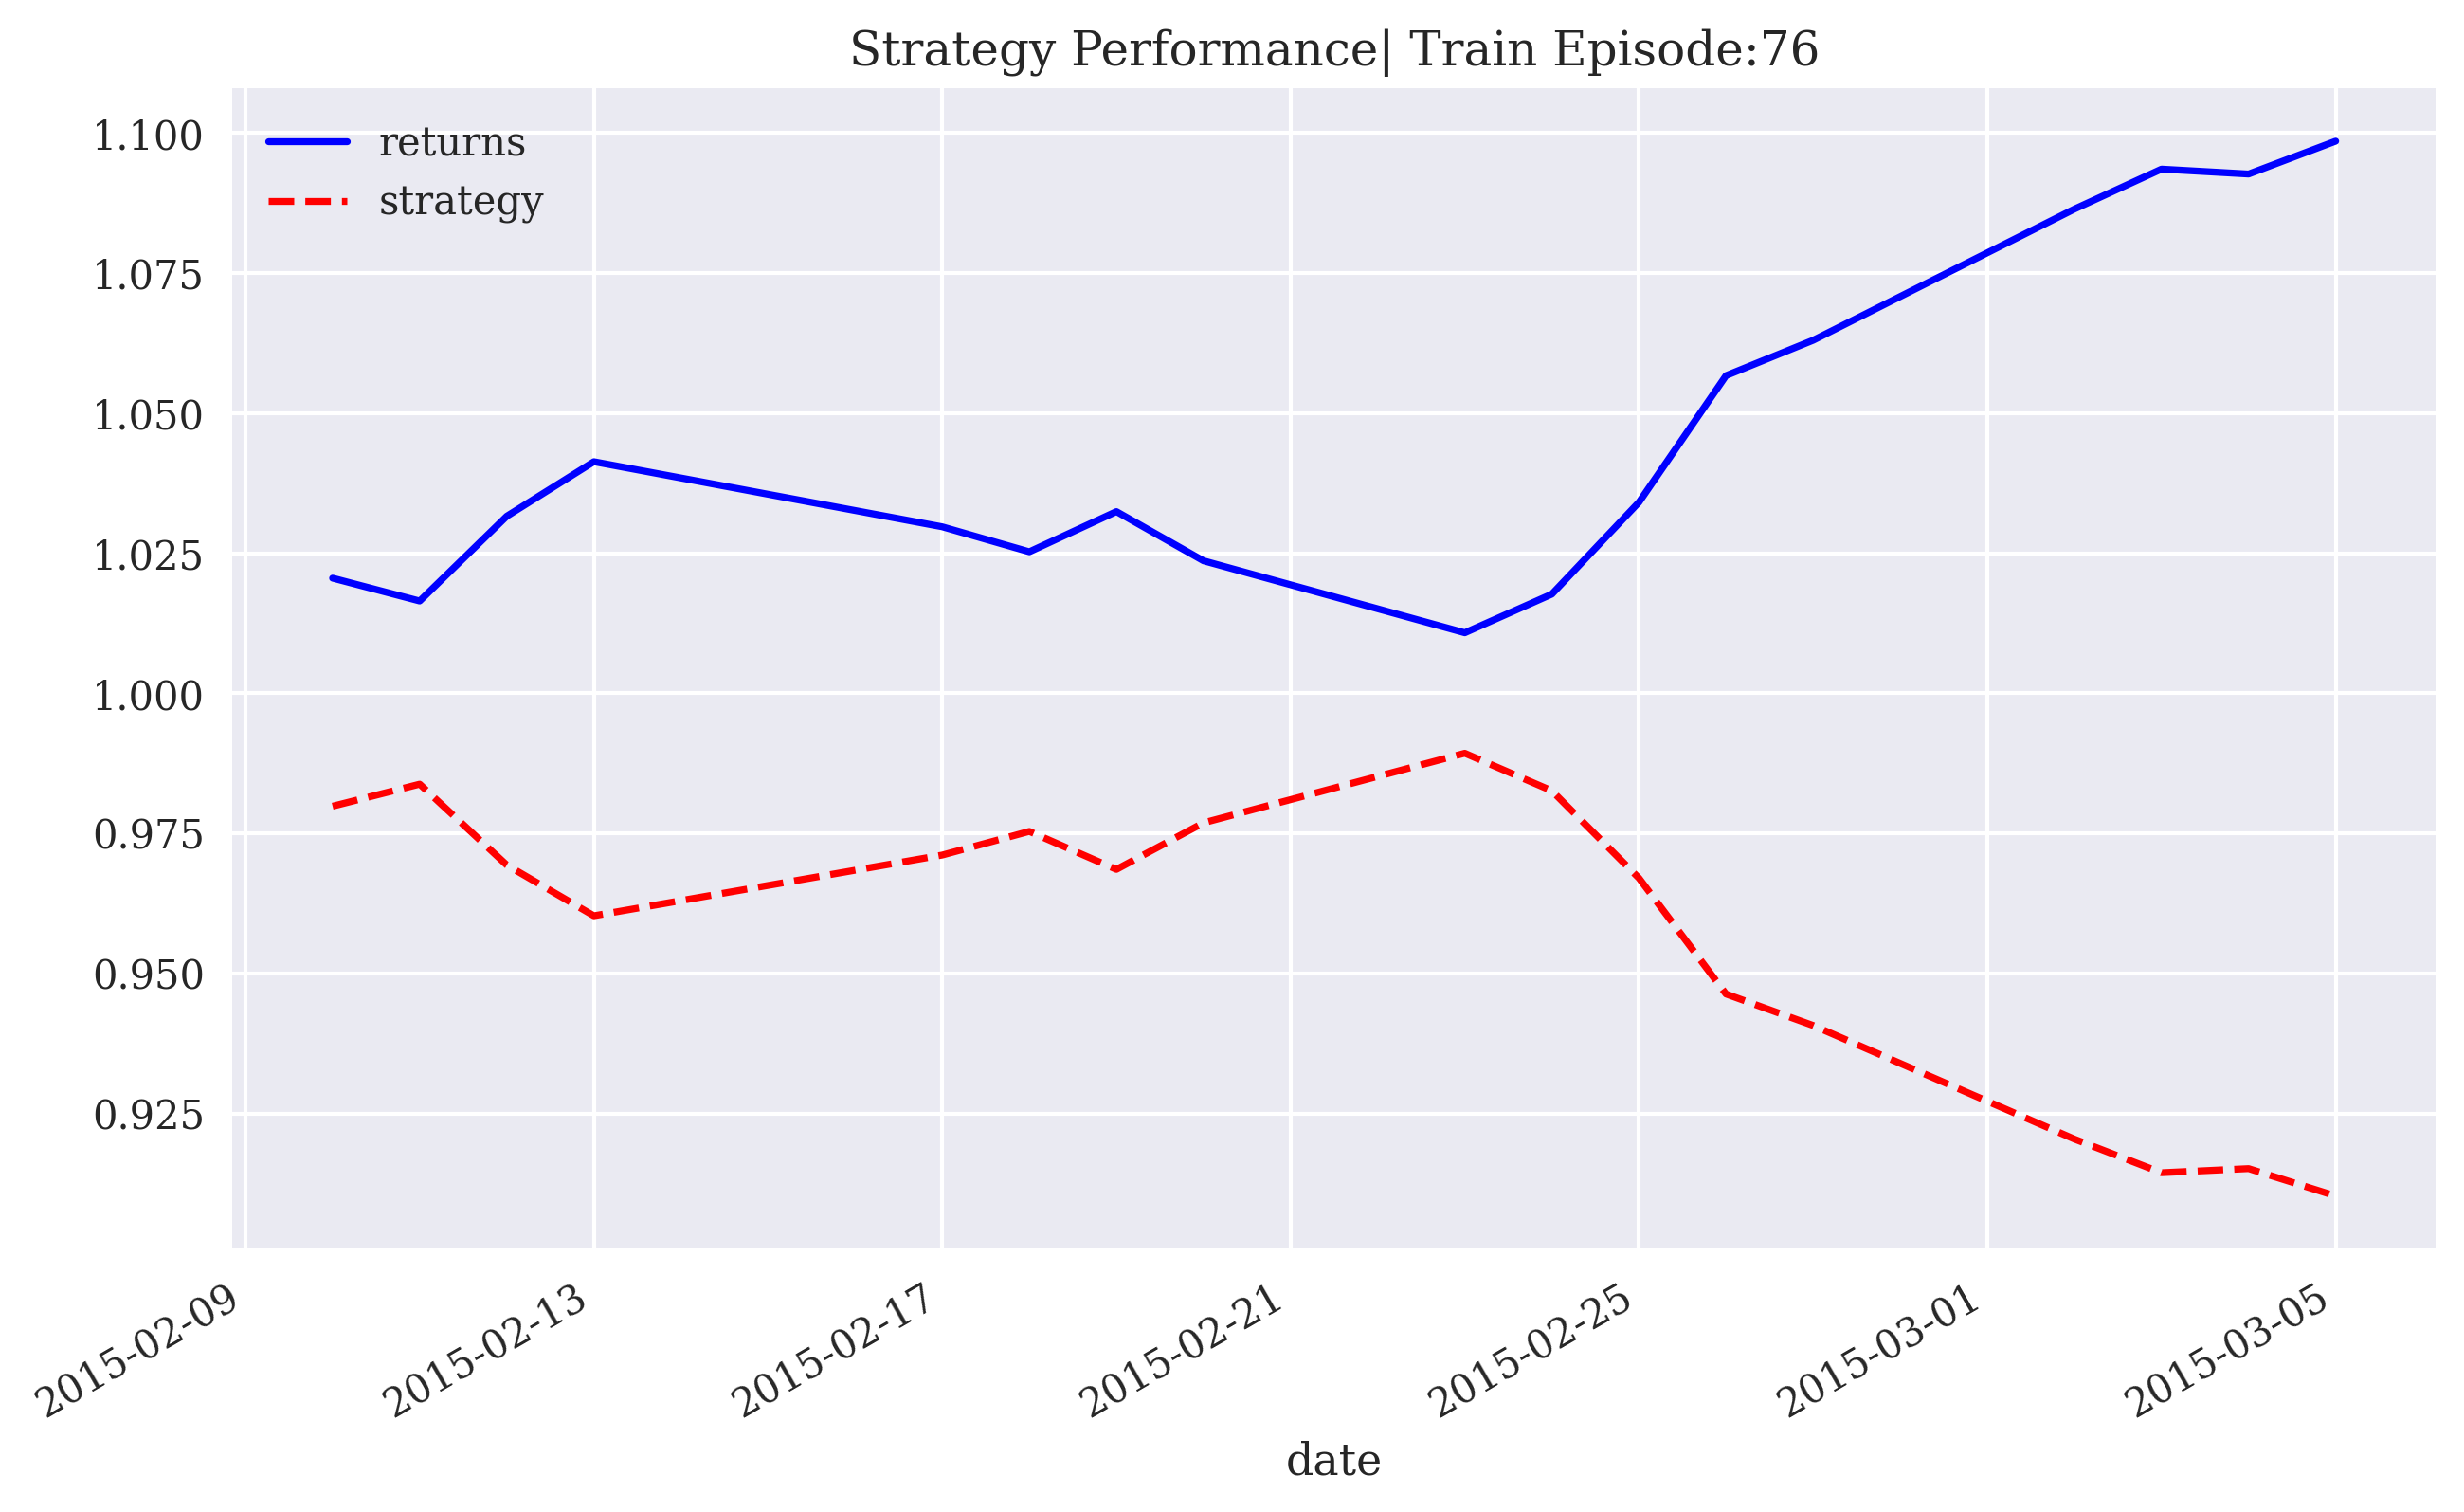

In [17]:
agent.generate_performance_plots(num_plots=10)

## Episode Plots

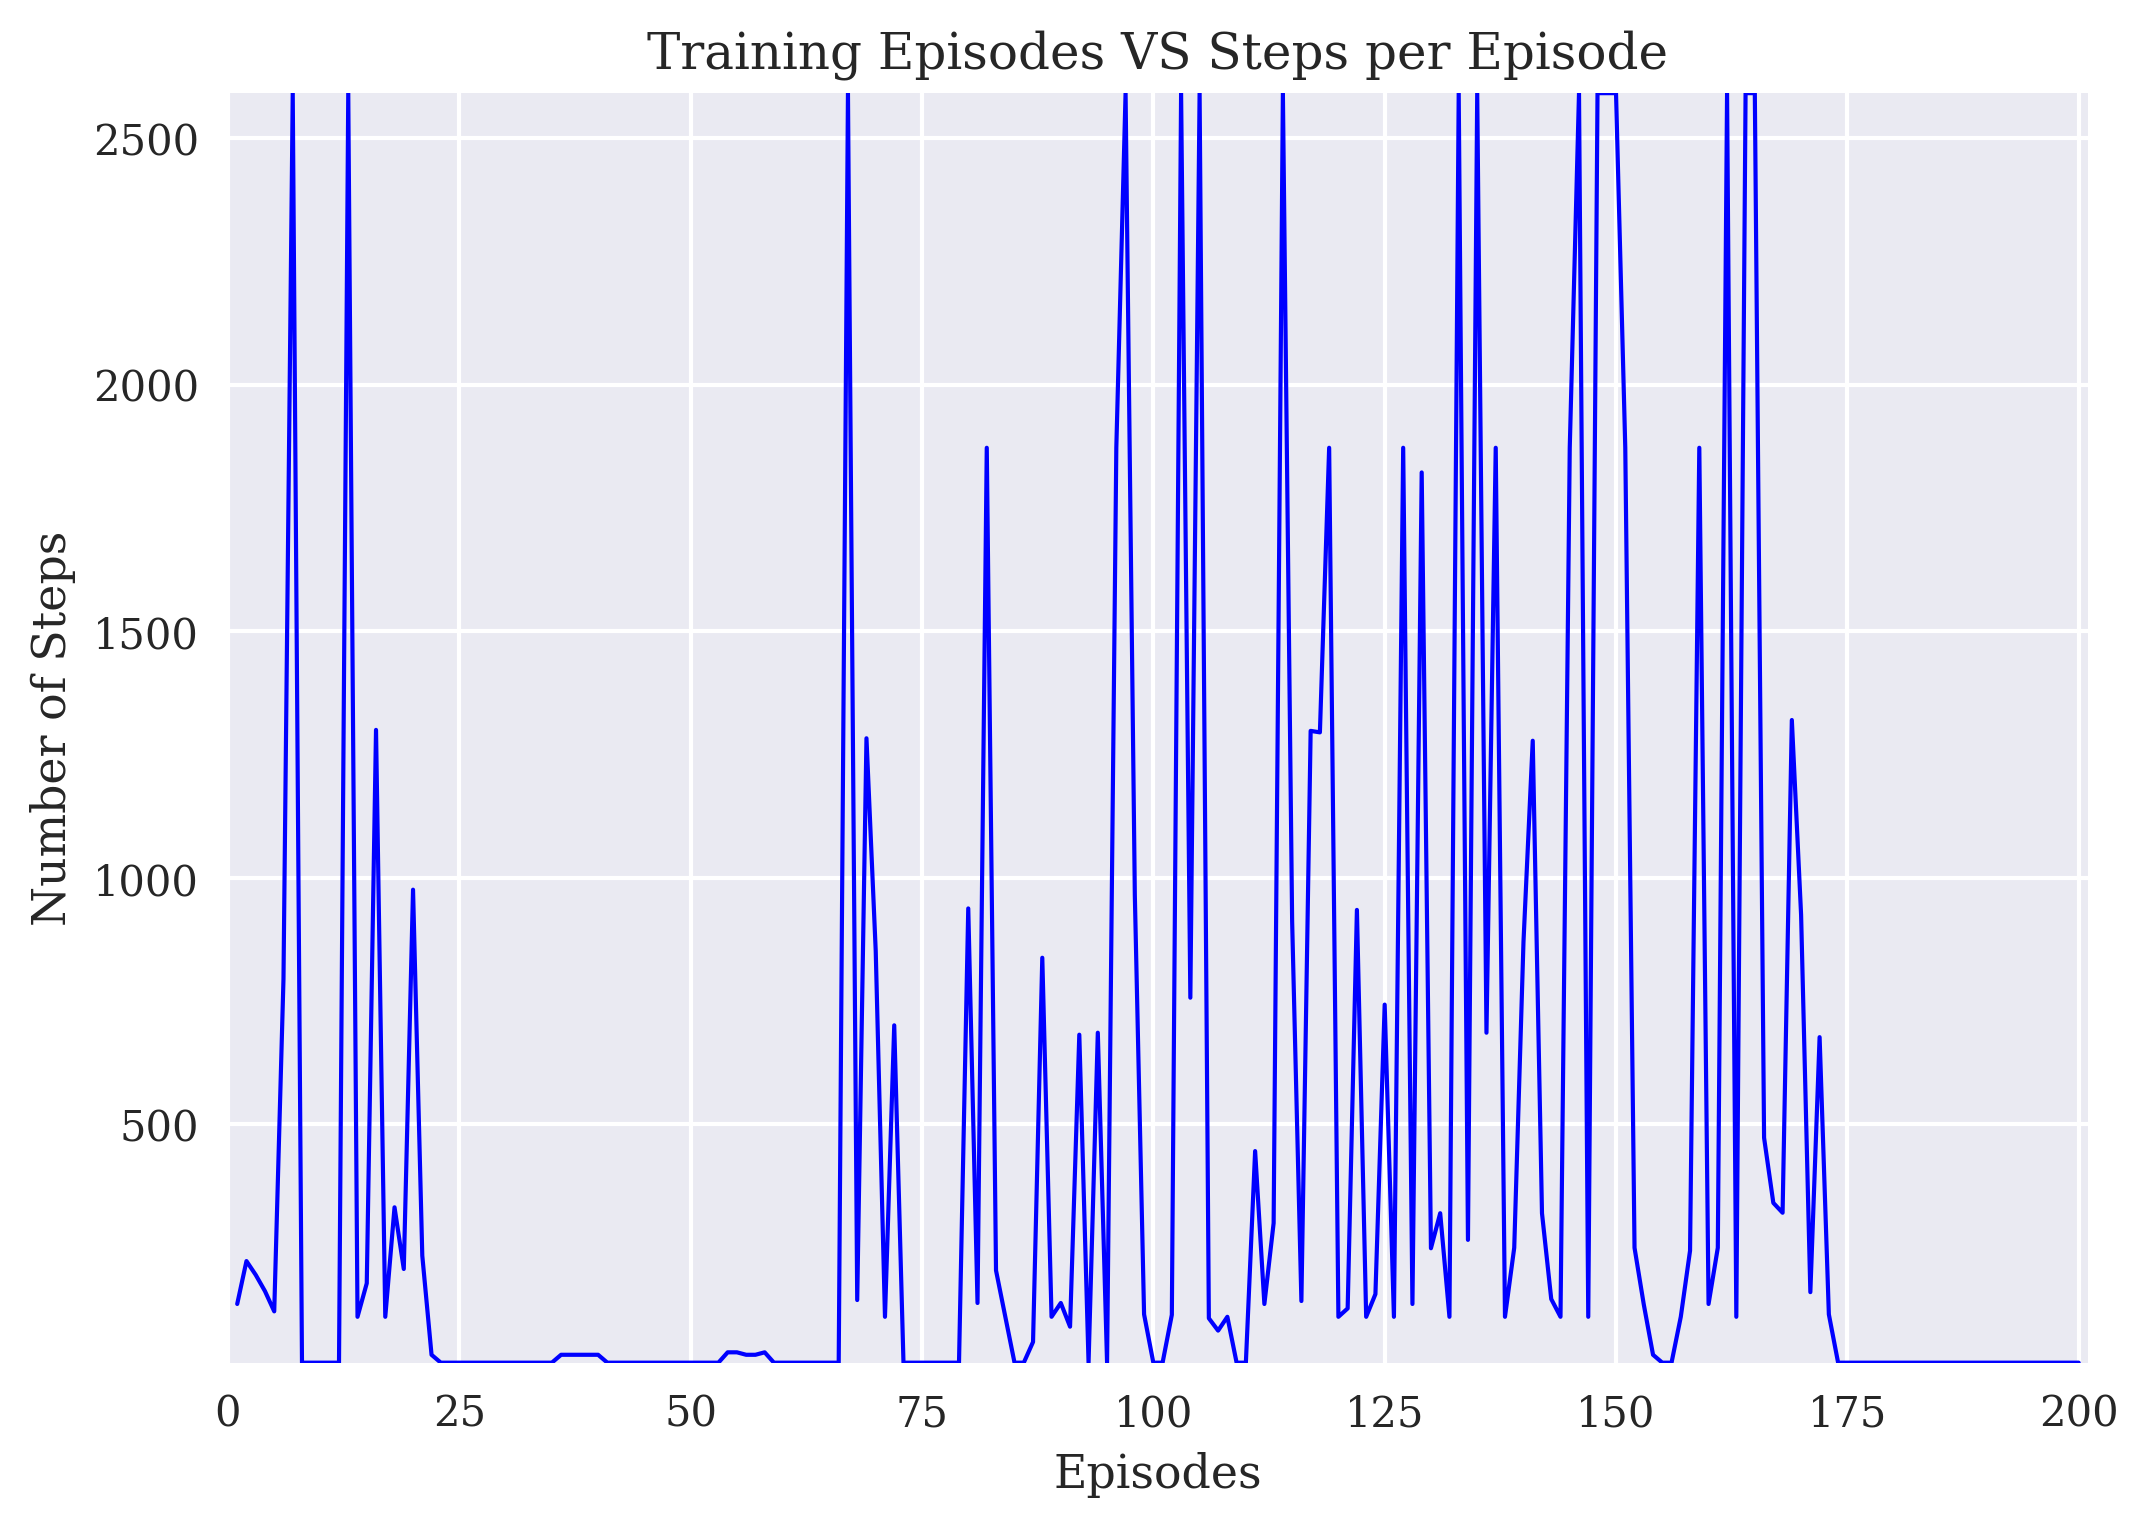

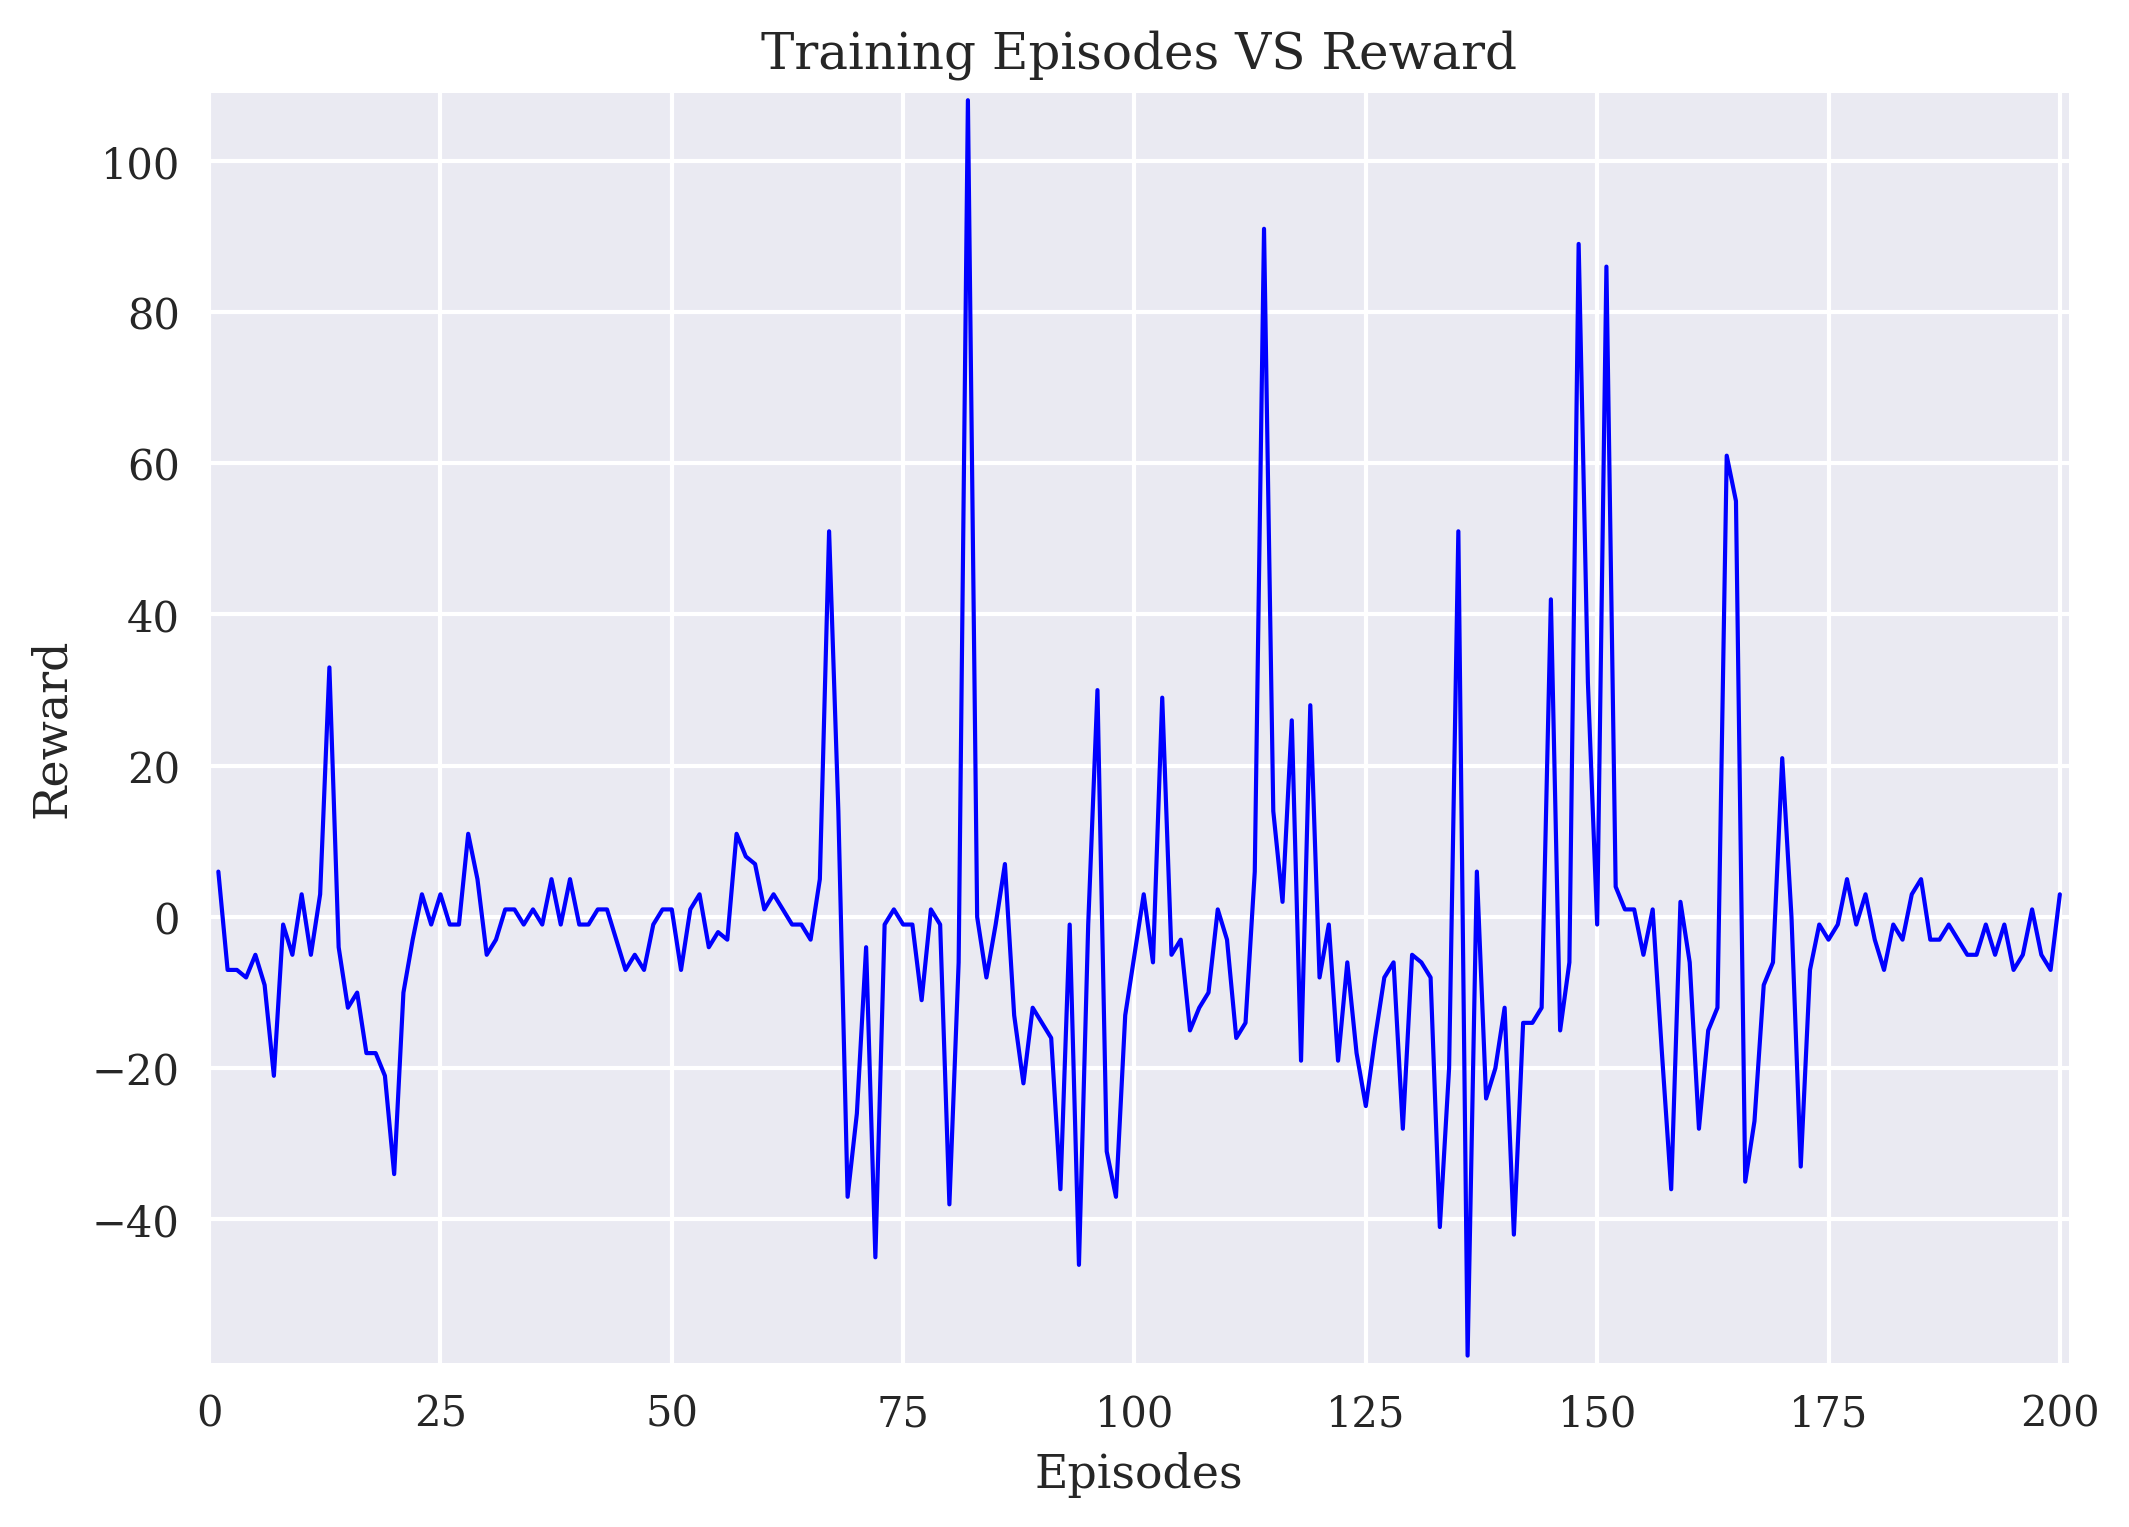

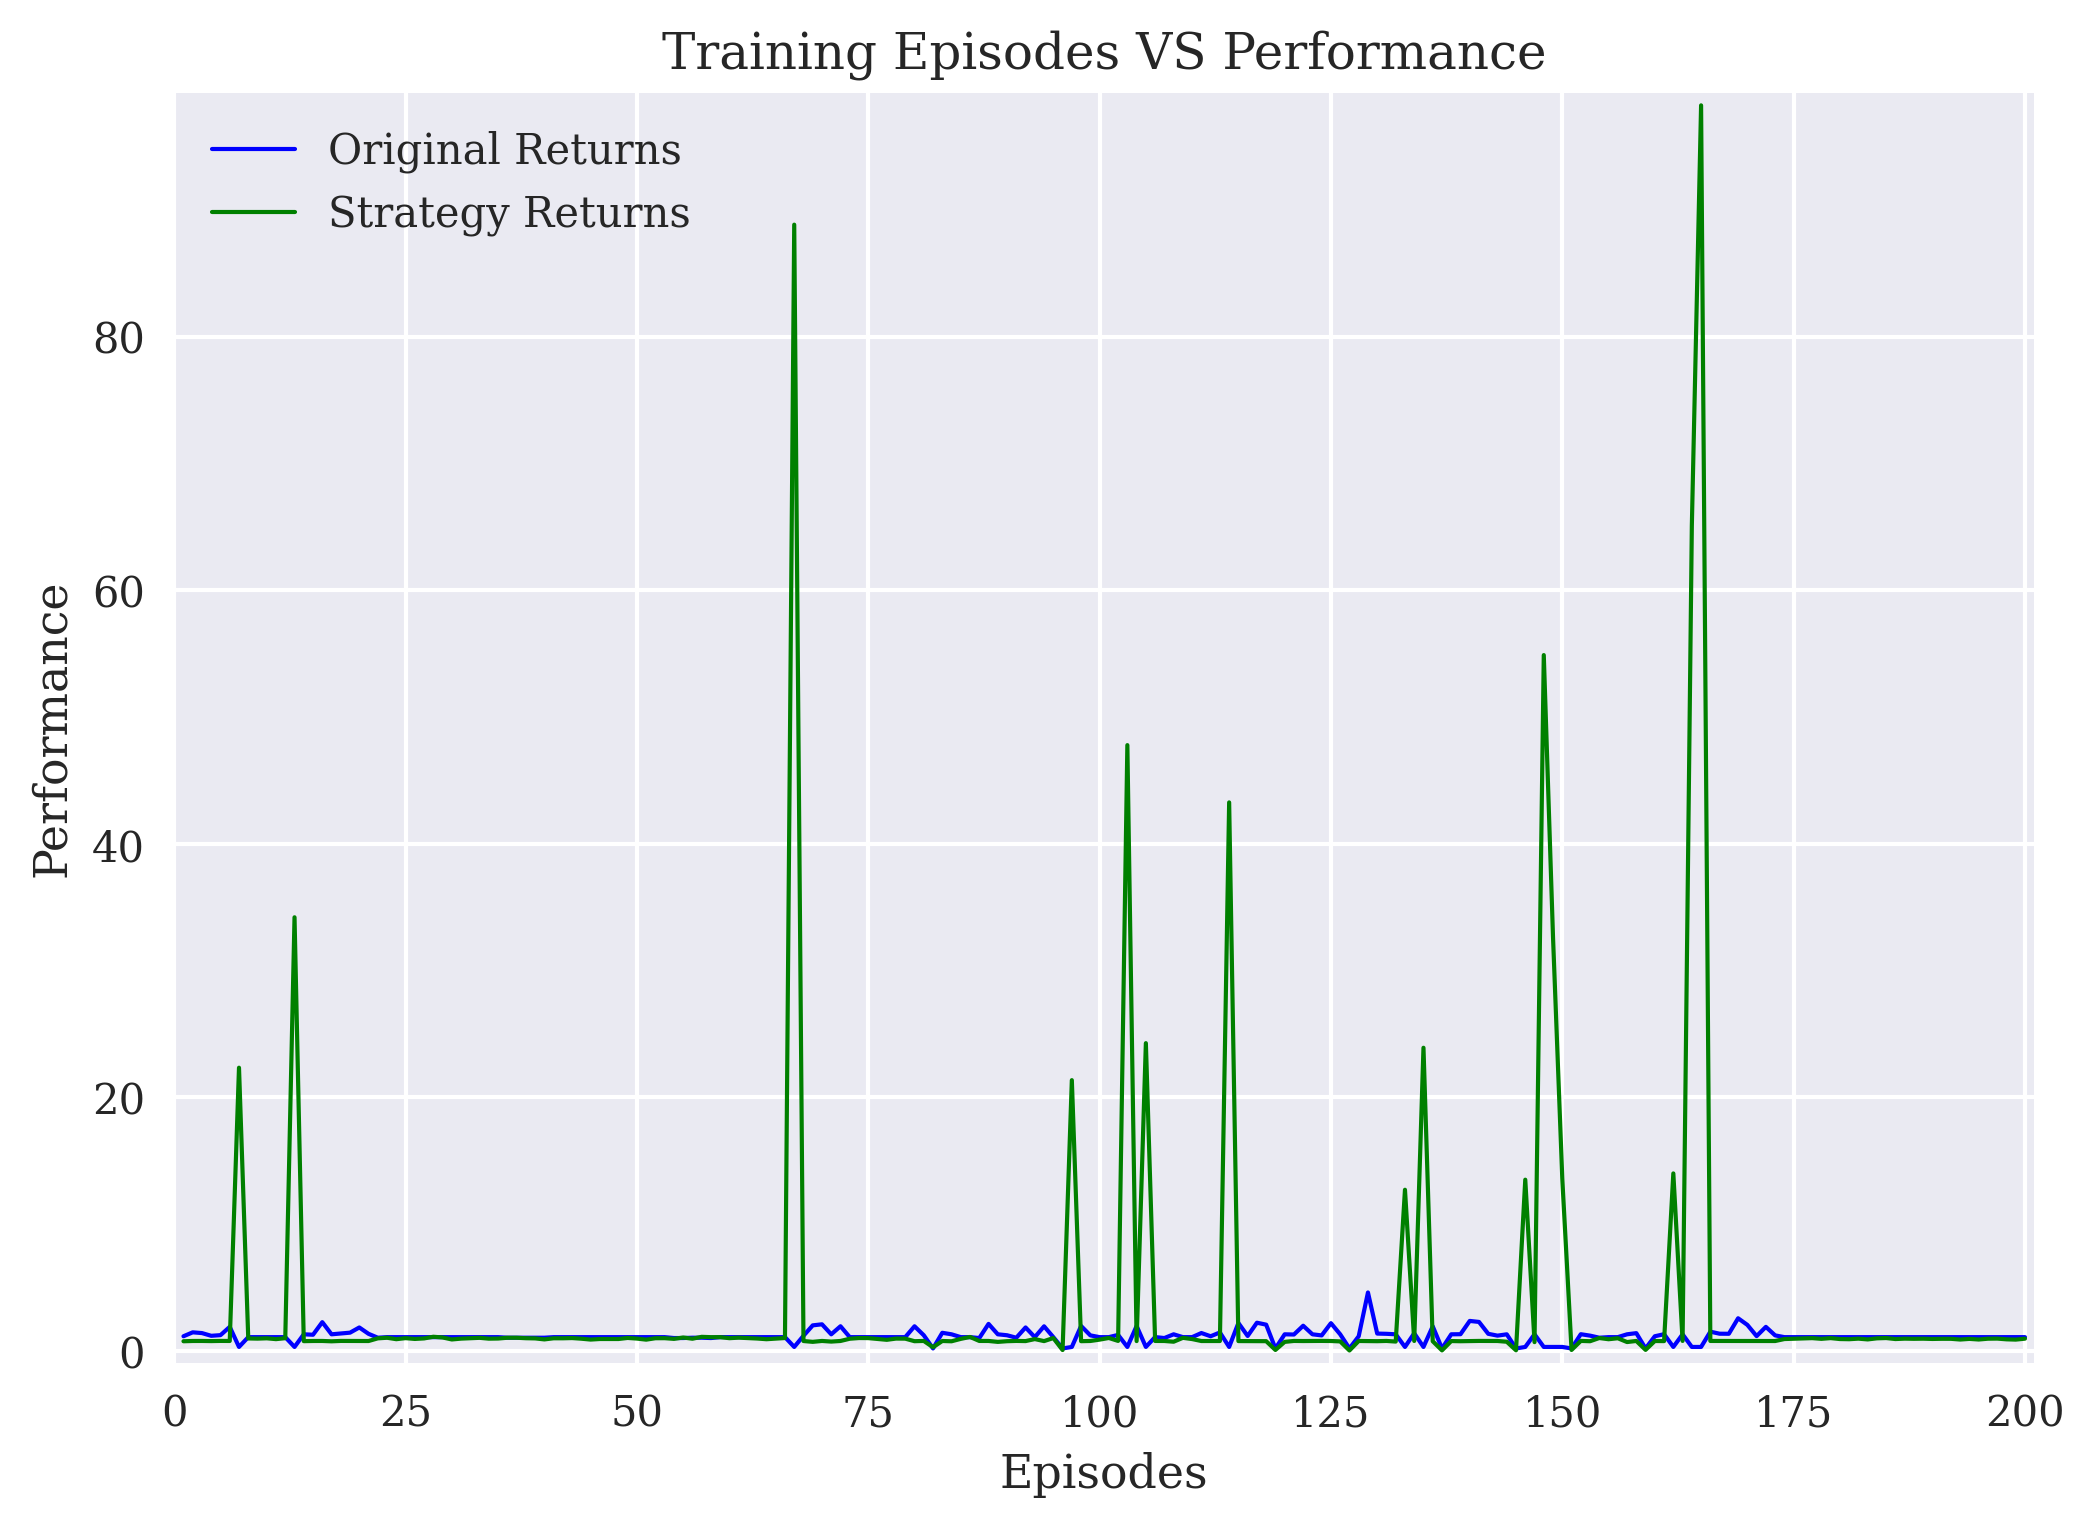

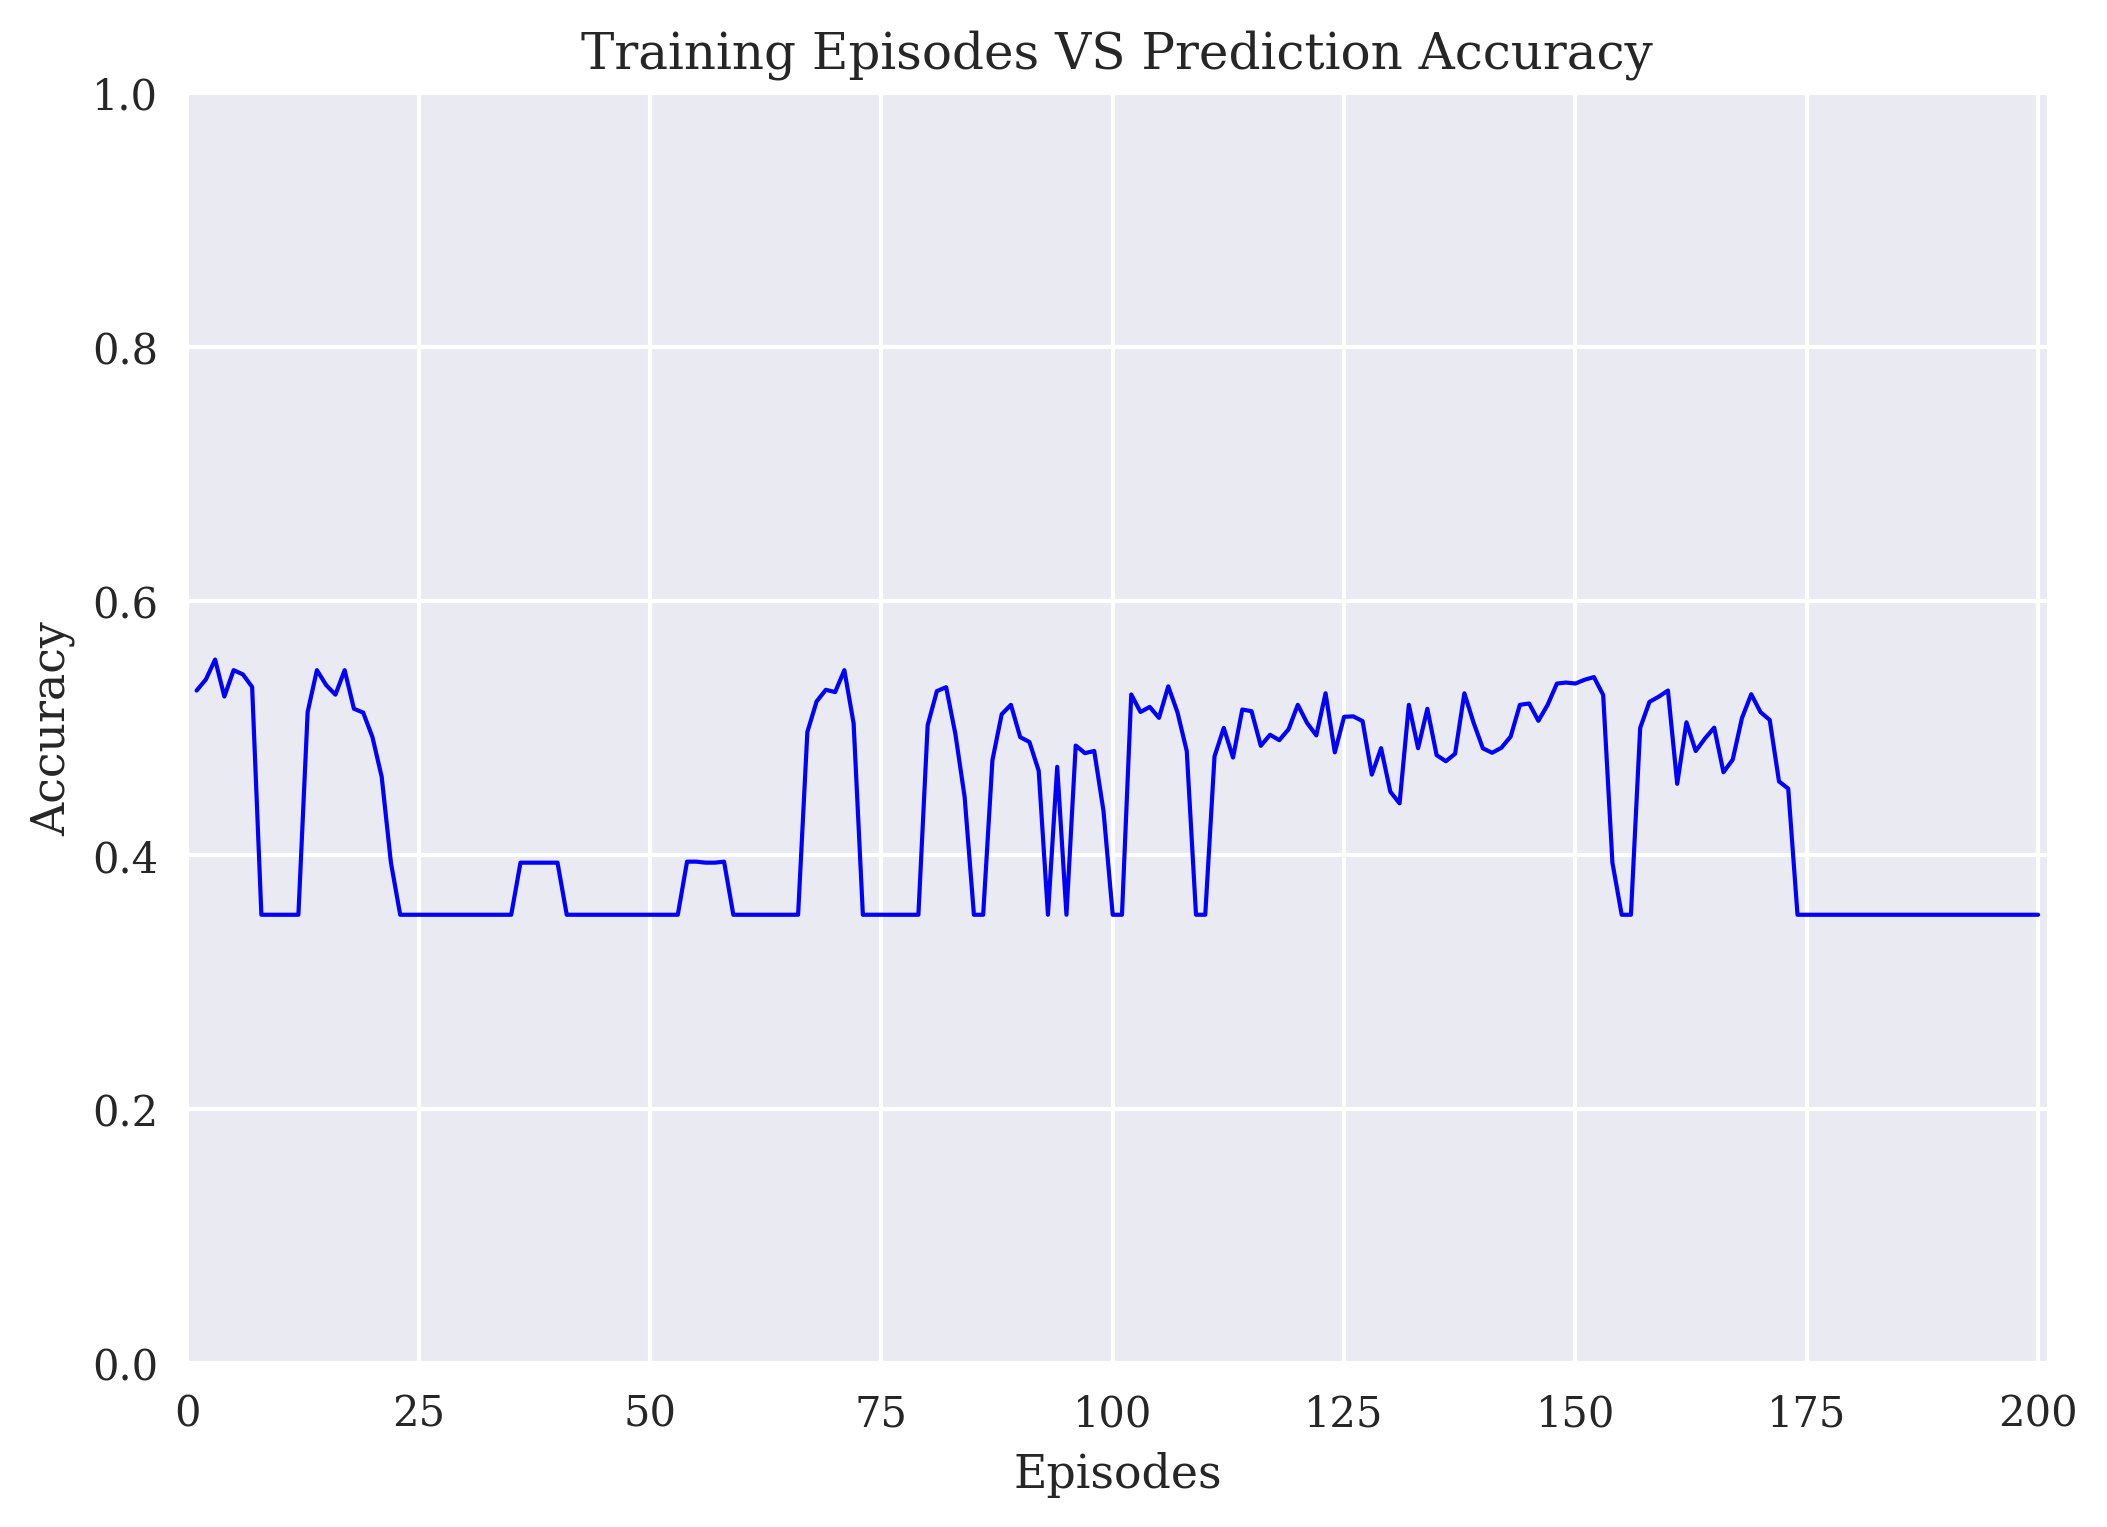

In [18]:
agent.generate_episode_plots()